In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np

from utils import load_image, toGrey, index_row_in_array, is_row_in_array, imshow_components

In [12]:
image_name = 'ds4s2.png'
# image_name = 'image.jpg'
# image_name = 'image2.png'
# image_name = 'a.jpg'
# image_name = 'semicolon.png'
# image_name = 'ds4s2.png'
# image_name = 'WIN_20190829_15_58_41_Pro.jpg'
# image_name = 'WIN_20190829_16_17_54_Pro.jpg'
# image_name = 'maxresdefault (1).jpg'
# image_name = 'plate.png'
# image_name = 'WhatsApp Image 2019-09-05 at 10.59.54.jpeg'
# image_name = 'Screenshot (287).png'
# image_name = 'snipshot.png'

image = load_image('dump/{}'.format(image_name))

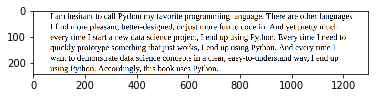

In [13]:
plt.imshow(image.astype(np.uint8))

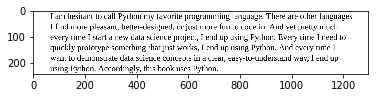

In [14]:
image = toGrey(image)
plt.imshow(image.astype(np.uint8), cmap='gray')

In [15]:
y = image.copy()
y_unique = np.unique(y)
y_unique_sorted  = np.sort(y_unique)
# y_unique

1


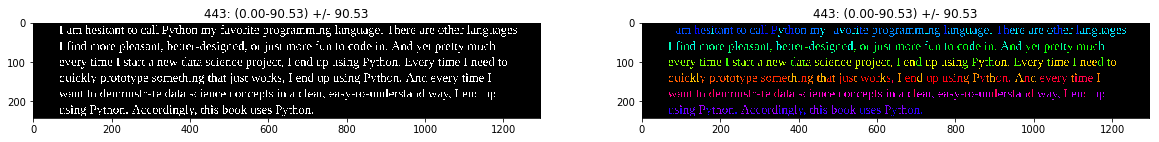

In [17]:
cls, cx = [], 0

for i in y_unique:
    m = abs(i - y_unique).flatten()
    m = m.mean() - m.std()/2
    
    a = i - m;a = 0 if a < 0 else a
    b = i + m;b = 255 if b > 255 else b
    
    img = ((y >= a) & (y <= b)).astype(np.uint8)

    display = False
    if len(cls) == 0:
        cls = np.array([img], dtype=np.uint8)
        prev = img.copy()
        
        display = True
#         print(img, i, m, end=" new!\n\n")
        
    else:
        diff = abs(prev - img.astype(np.int8)).mean()
#         print(diff)
        if diff > 0.075 and (not is_row_in_array(img, cls)):
    #         print(img, i, m, end="\n\n")
            cls = np.concatenate((cls, [img]))
            prev = img.astype(np.int64).copy()
            display = True
    
    if display:      
        cx+=1
        
        fig=plt.figure(figsize=(20, 20))
        w, h, rows, columns = 10, 10, 1, 2
        
        ret, labels = cv2.connectedComponents(img)
        labeled_img = imshow_components(labels)
        
        li = [0, img, labeled_img]
        
        print(len(cls))
        for k in range(1, columns*rows +1):
            ax = fig.add_subplot(rows, columns, k)
            ax.set_title('{}: ({:.2f}-{:.2f}) +/- {:.2f}'.format(np.amax(labels), a, b, m))
            
            if k == 2:
                img1 = li[k]
                plt.imshow(li[k])
                
            if k == 1:
                img1 = np.zeros(tuple(list(img.shape)+[3]))
                for i in range(3):
                    img1[:,:,i] = 255*img
                plt.imshow(li[k], cmap='gray')
                
                cv2.imwrite('dump/{}-{}.png'.format(len(cls), k), img1)
        plt.show()
          
    
    if cx == 1: break

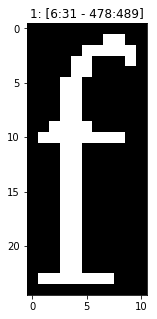

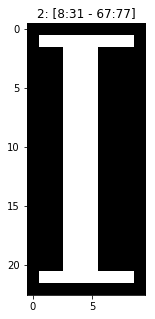

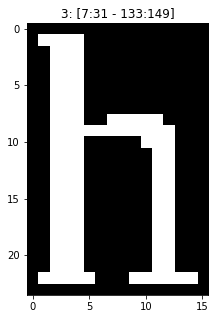

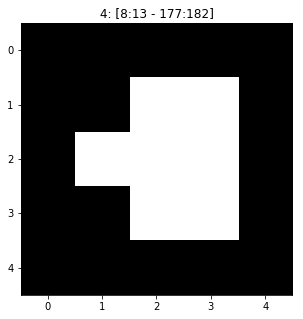

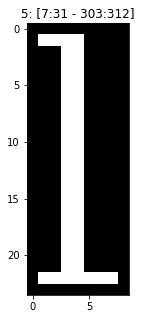

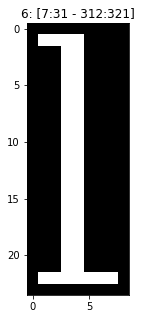

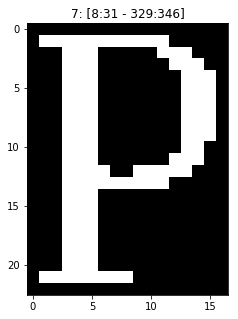

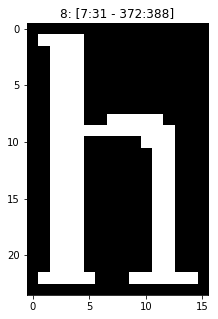

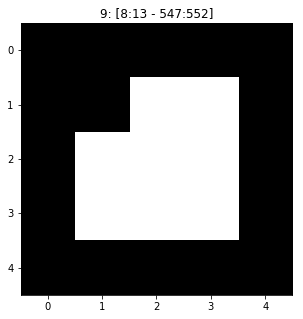

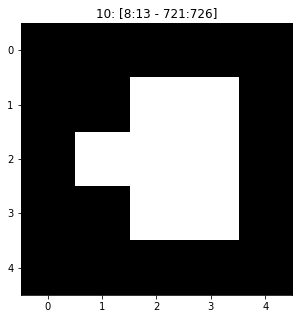

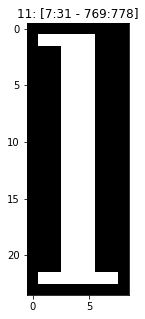

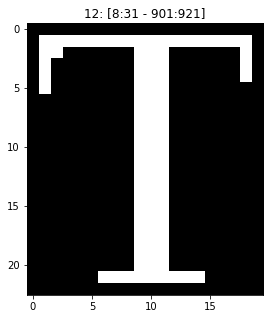

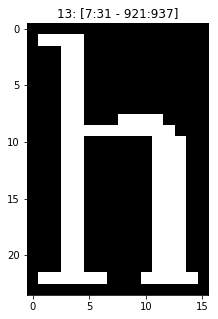

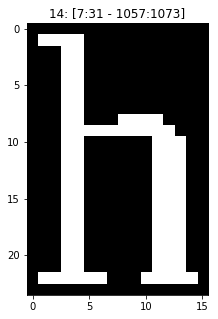

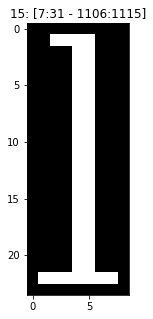

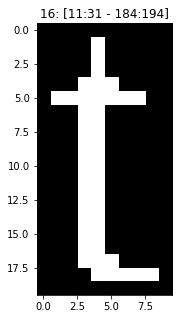

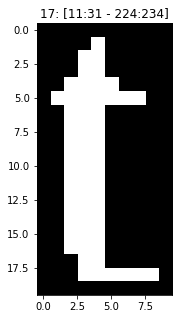

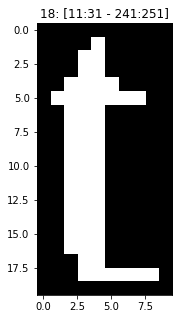

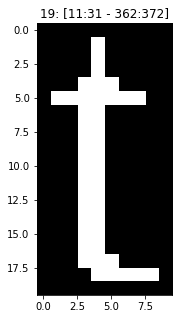

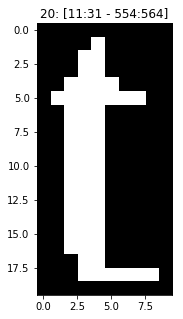

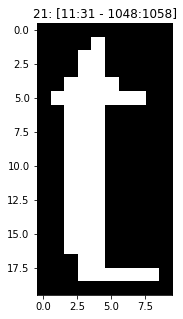

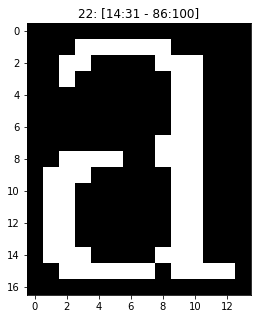

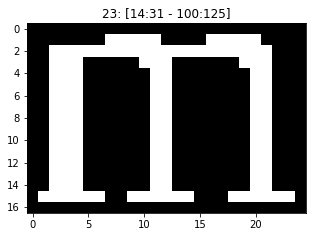

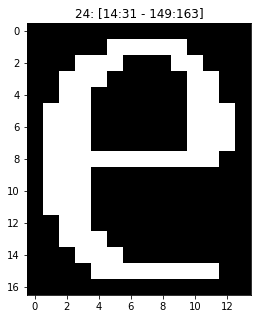

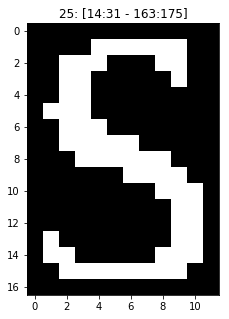

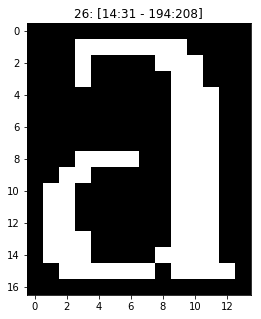

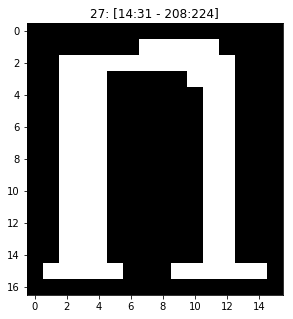

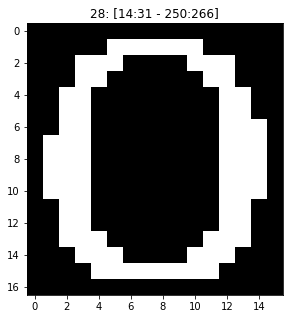

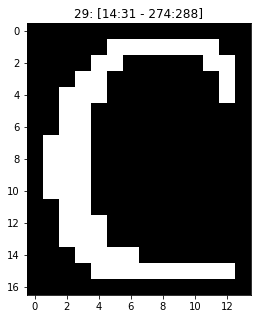

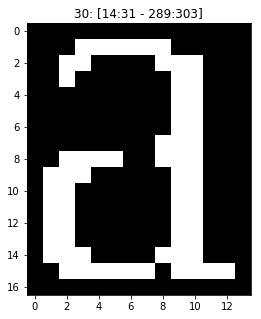

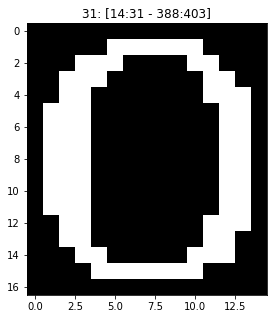

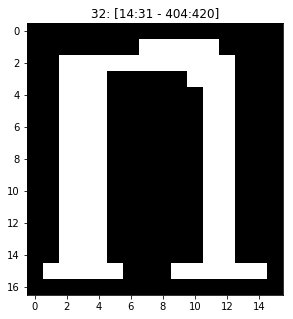

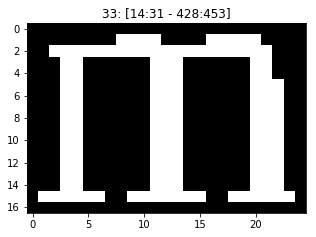

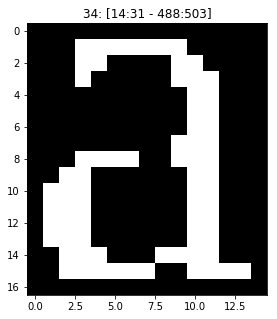

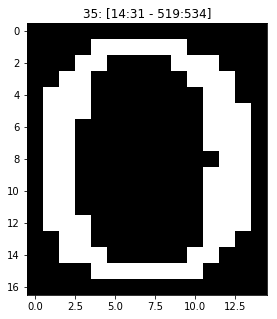

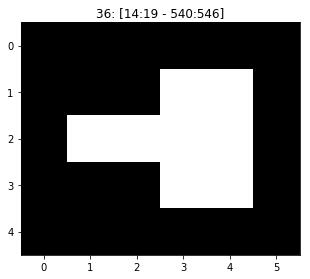

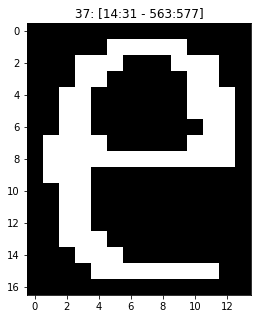

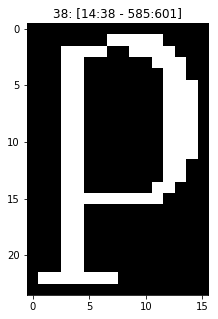

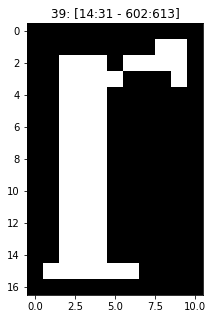

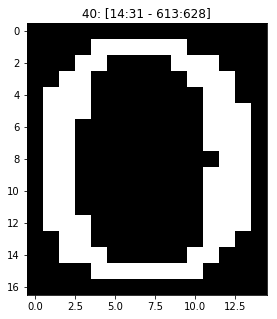

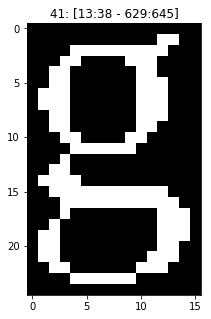

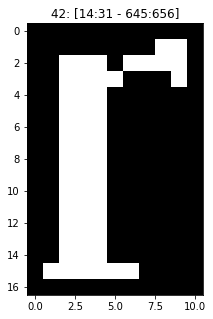

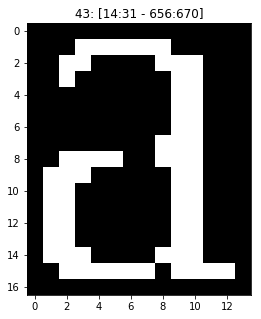

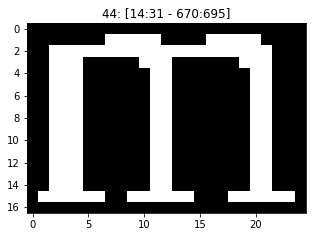

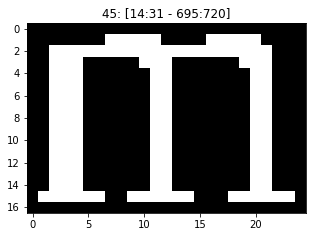

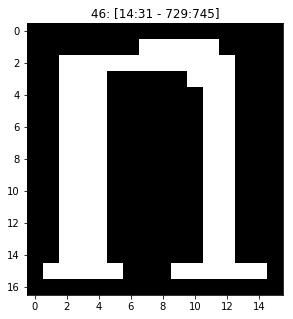

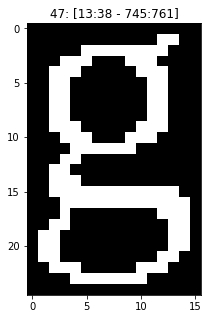

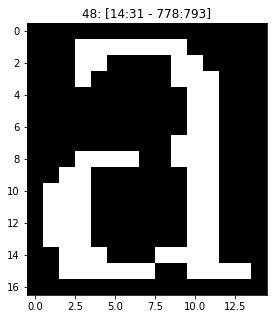

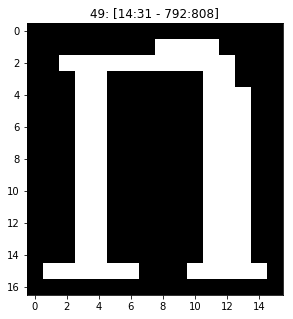

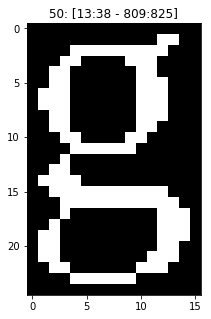

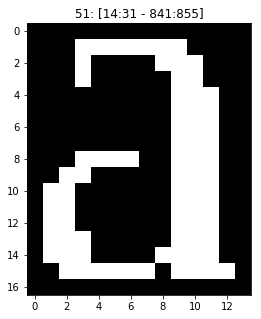

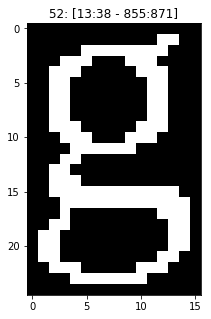

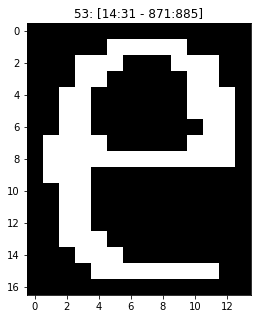

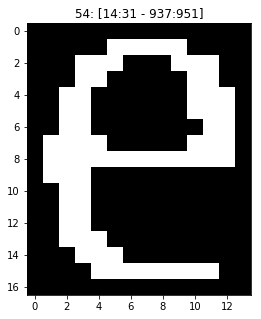

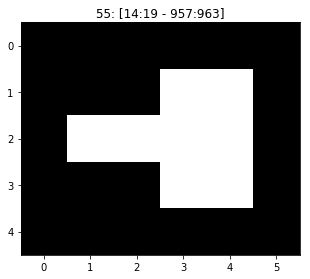

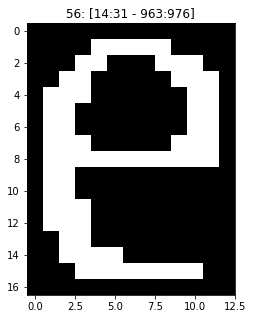

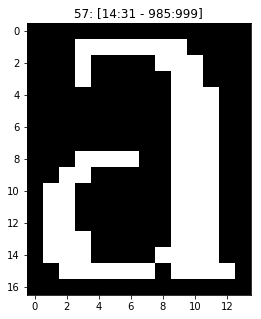

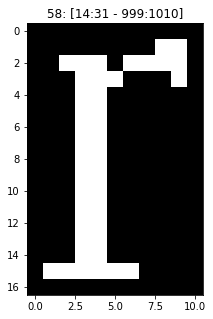

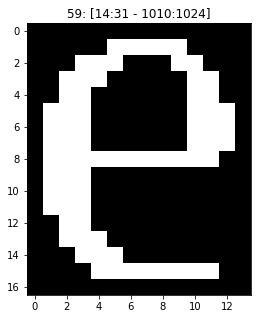

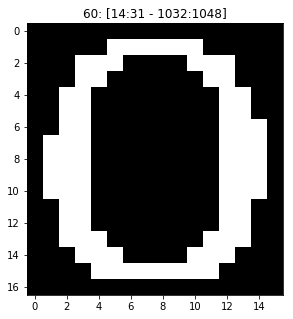

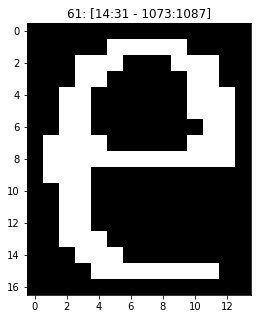

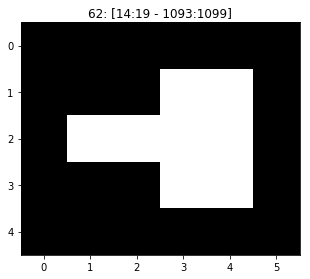

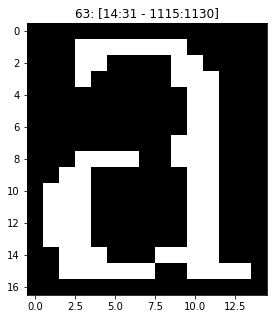

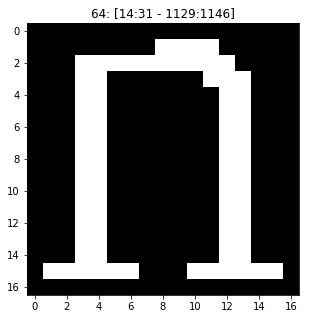

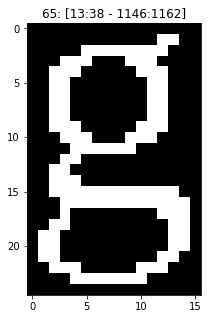

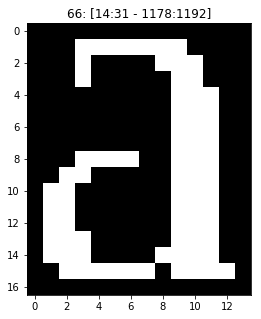

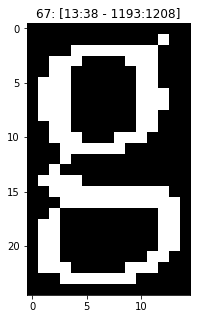

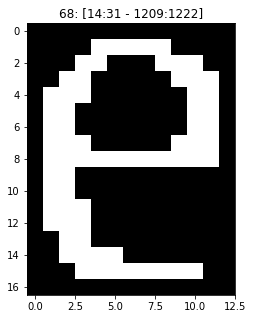

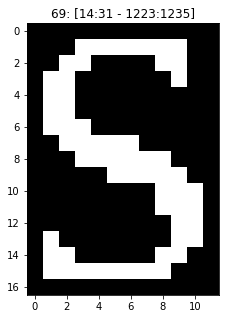

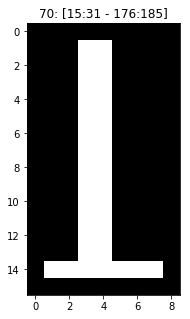

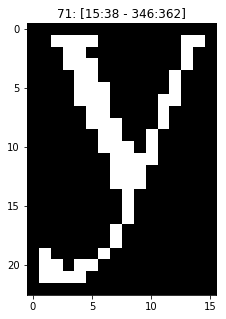

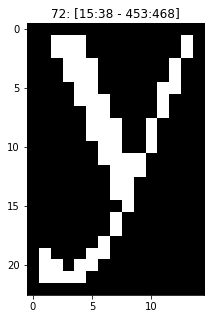

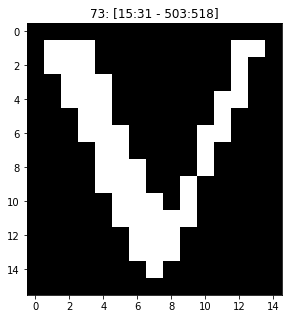

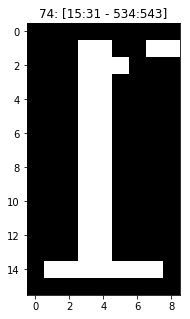

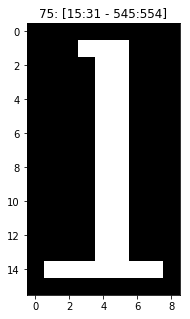

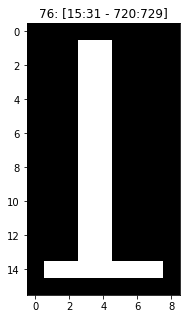

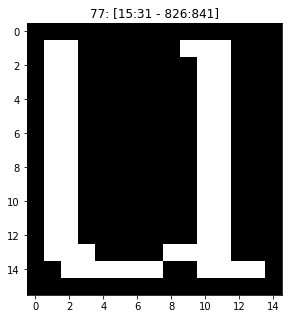

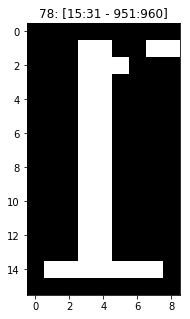

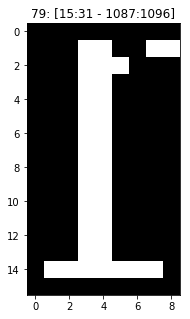

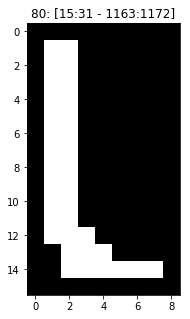

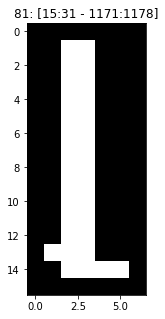

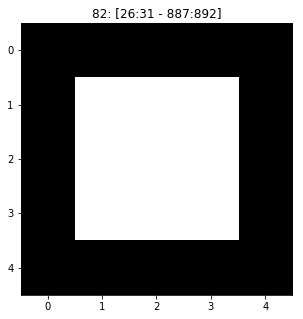

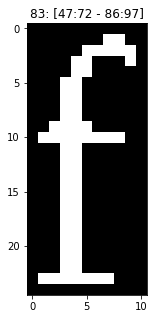

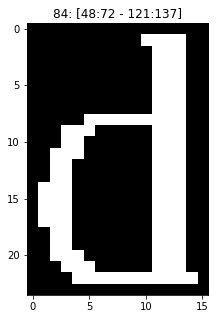

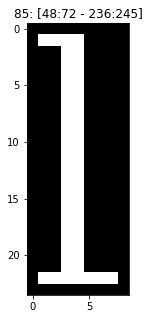

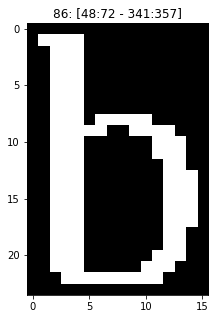

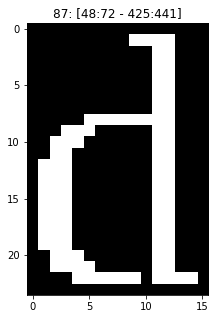

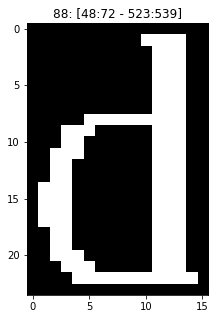

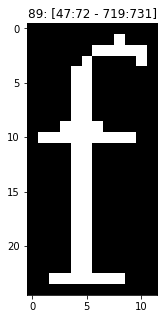

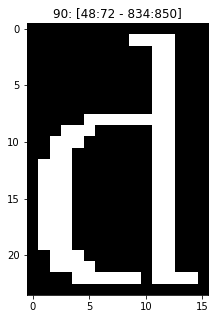

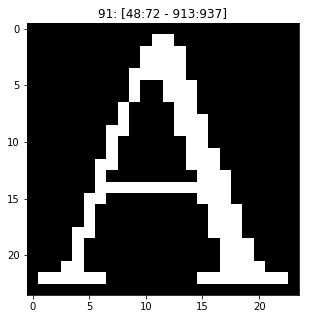

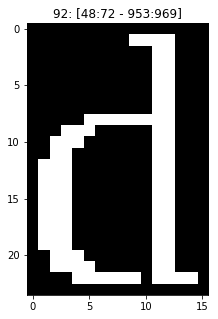

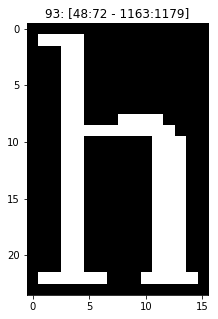

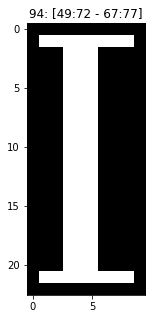

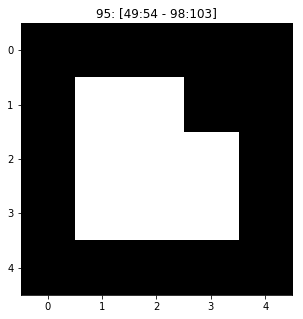

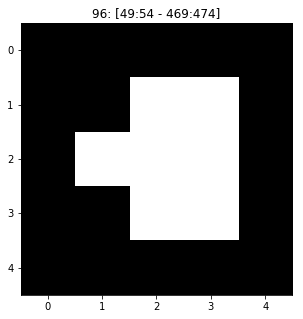

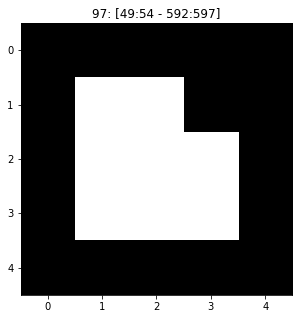

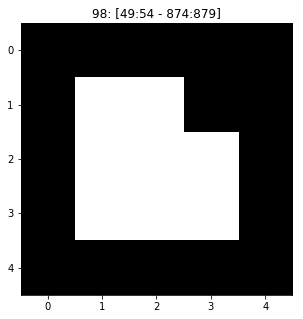

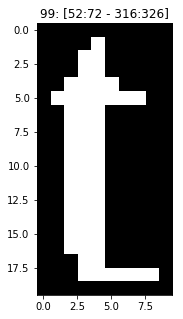

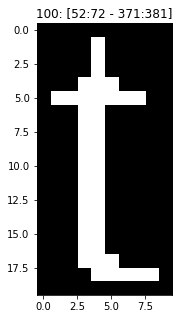

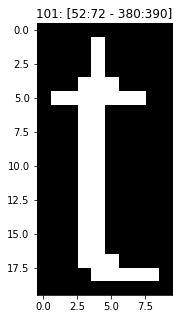

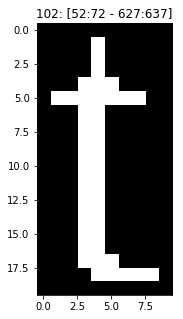

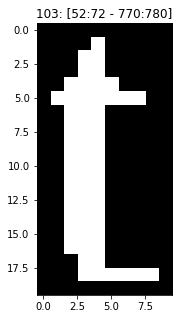

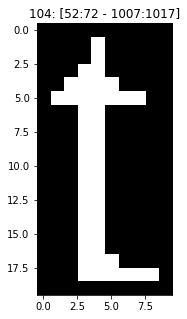

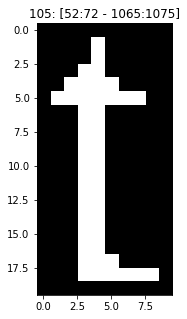

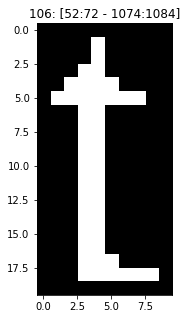

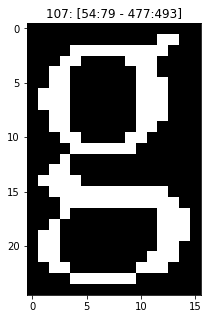

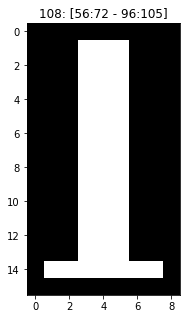

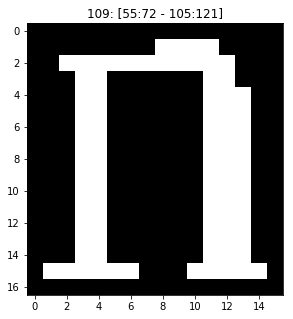

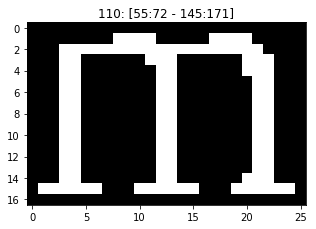

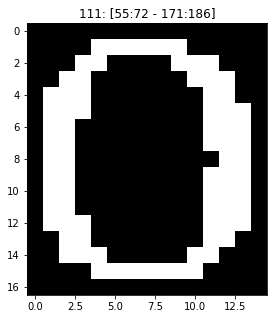

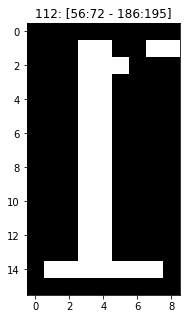

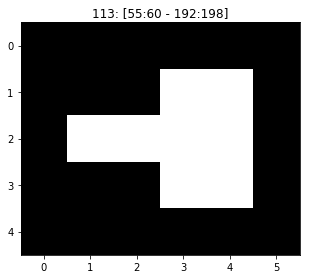

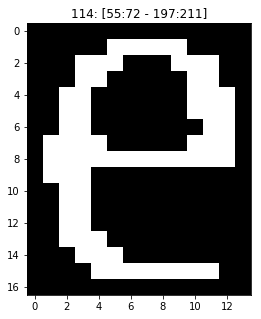

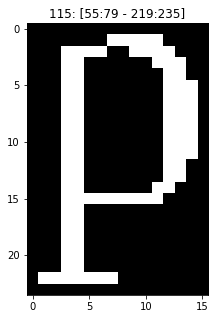

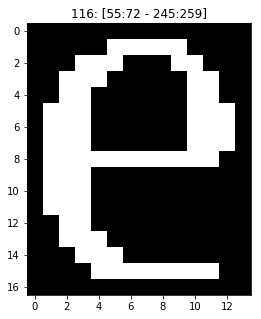

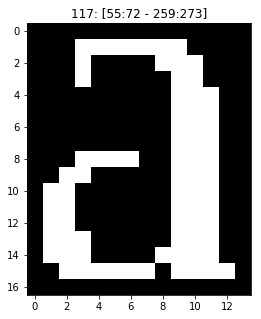

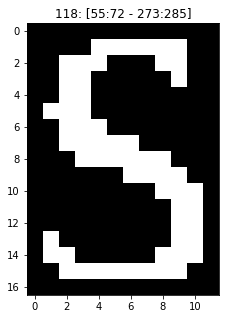

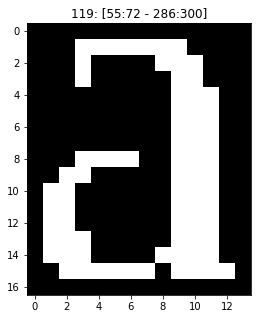

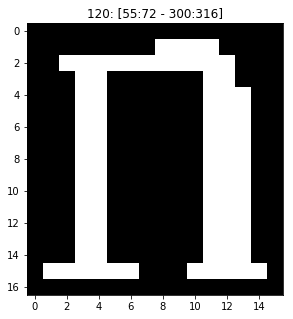

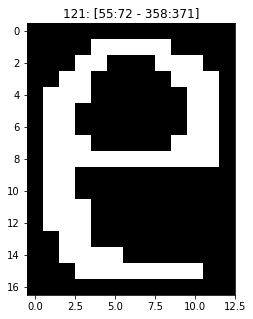

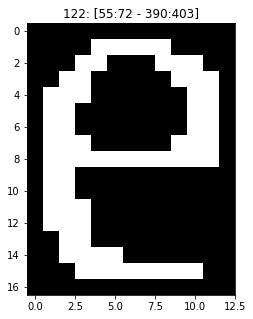

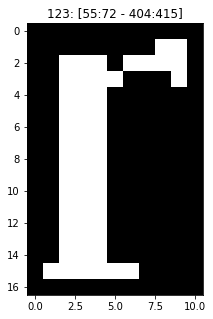

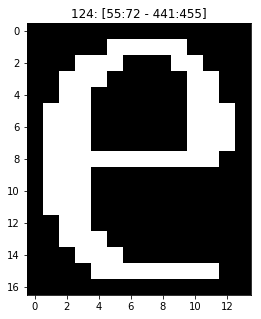

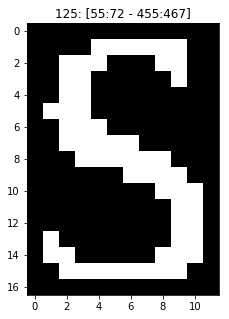

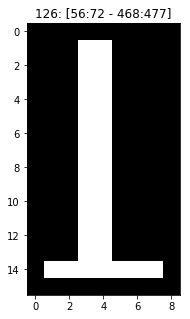

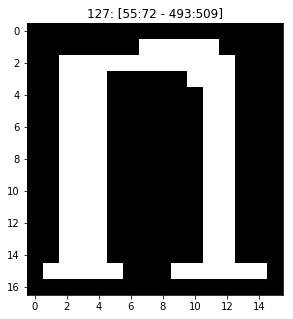

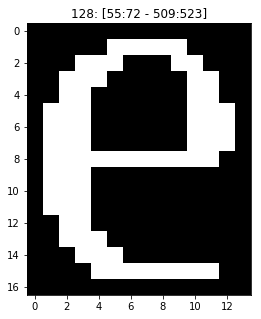

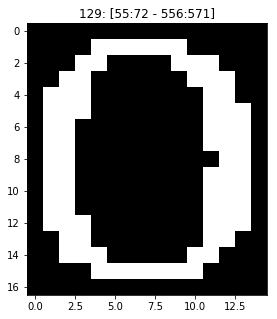

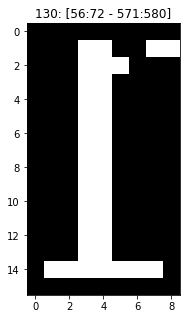

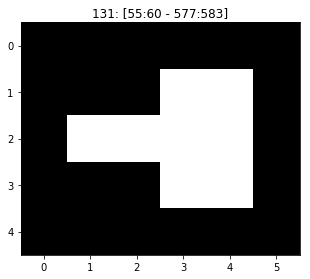

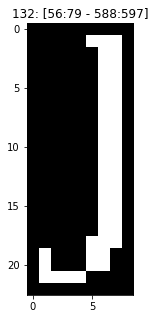

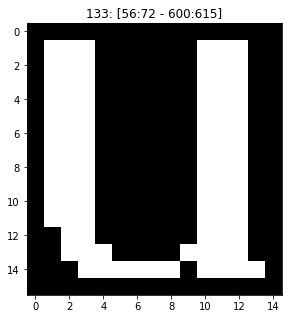

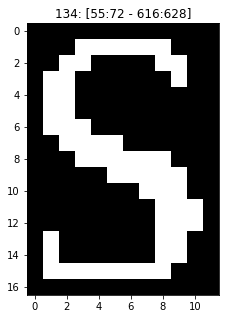

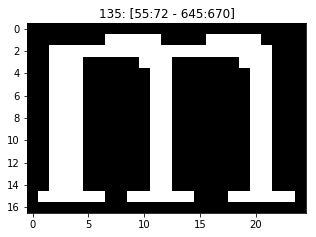

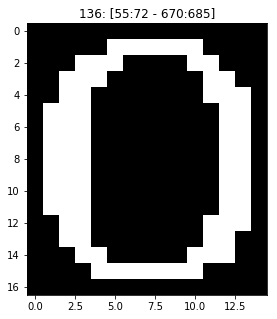

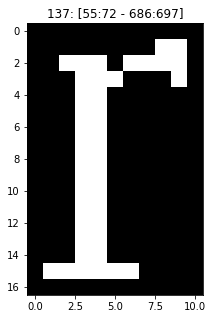

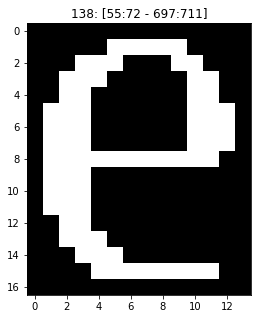

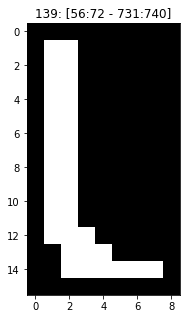

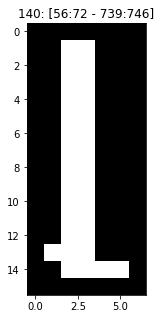

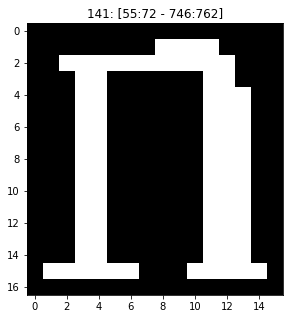

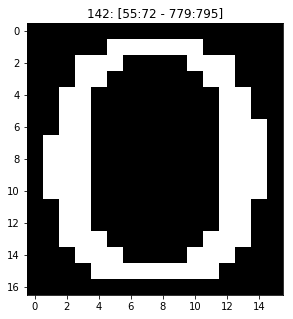

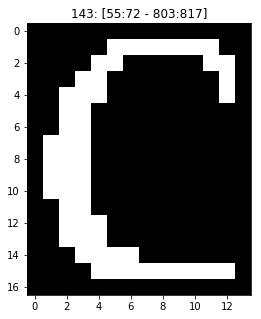

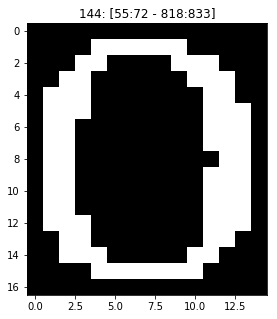

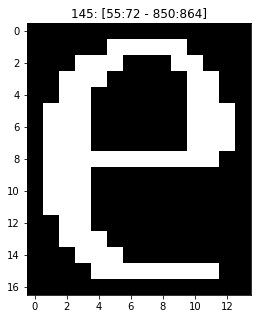

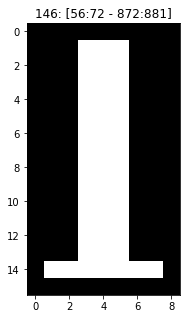

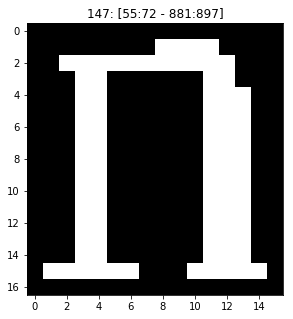

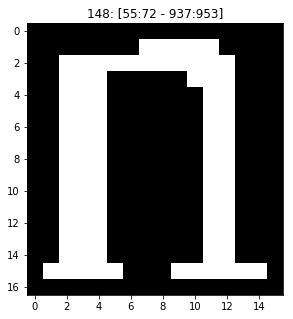

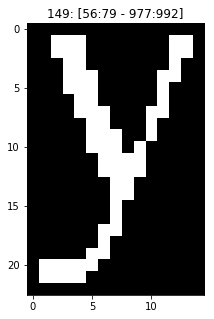

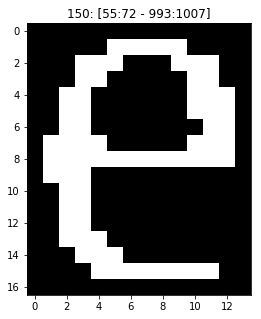

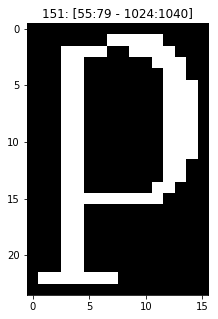

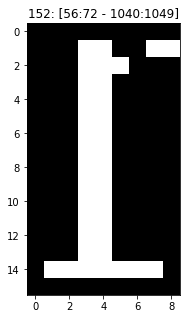

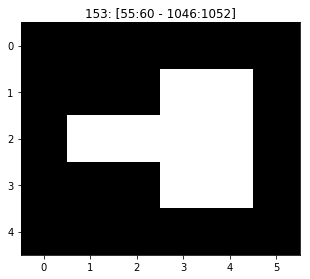

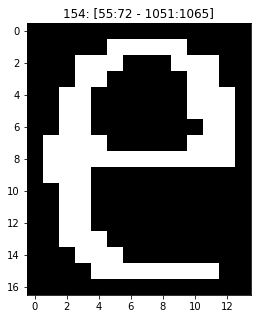

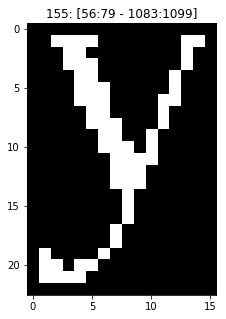

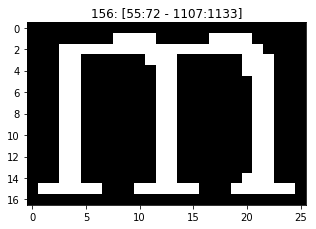

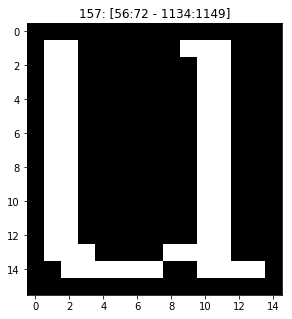

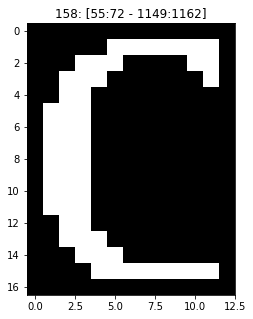

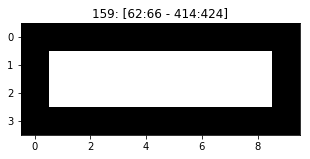

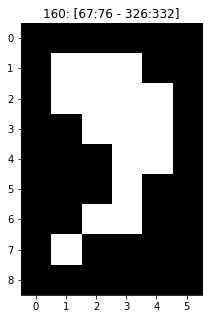

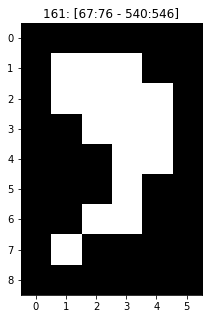

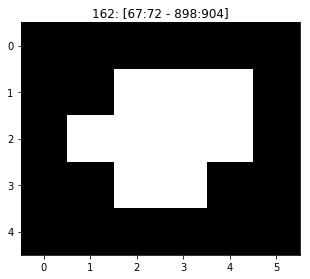

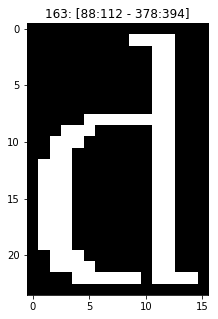

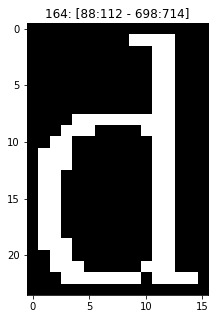

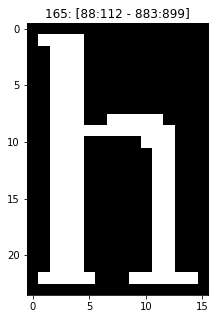

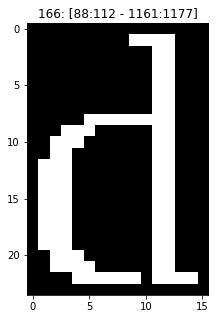

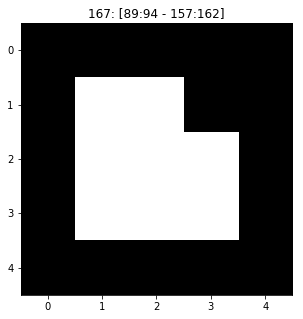

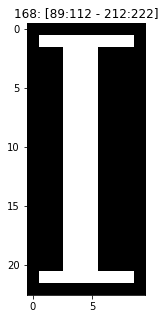

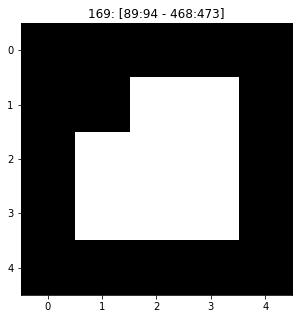

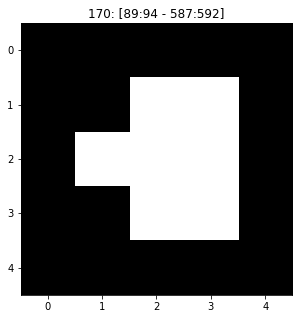

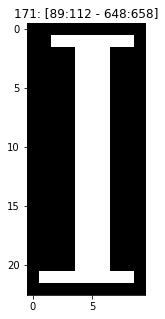

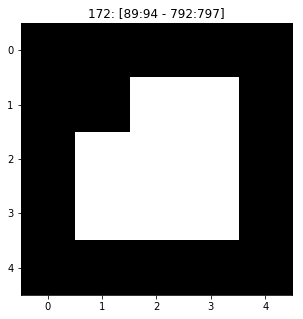

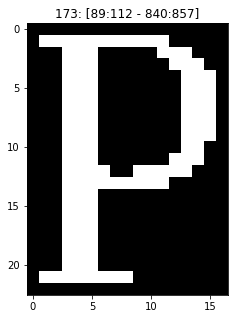

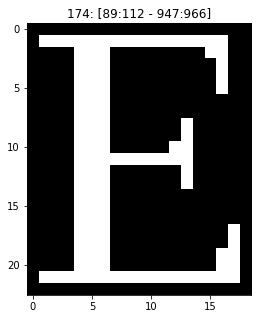

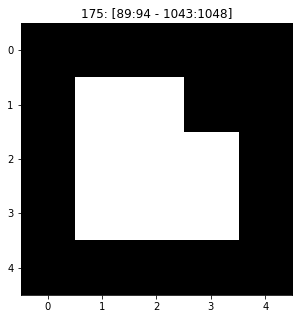

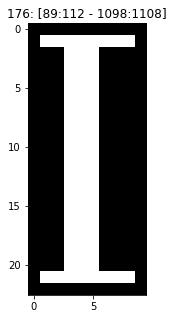

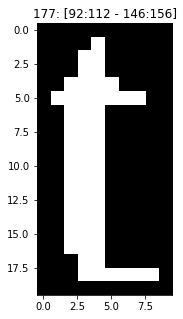

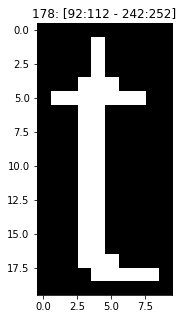

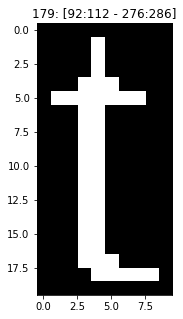

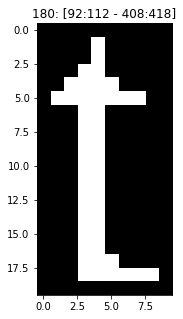

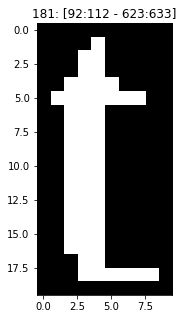

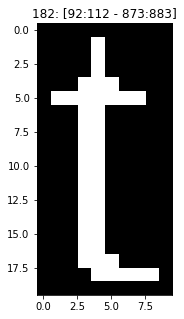

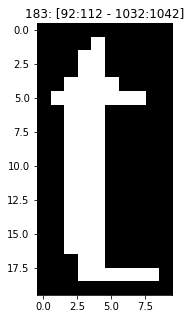

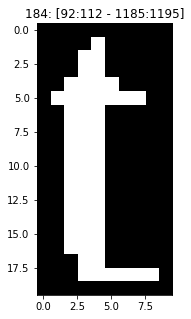

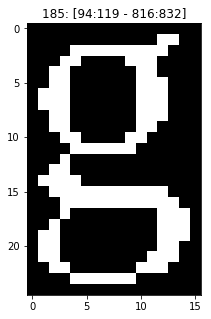

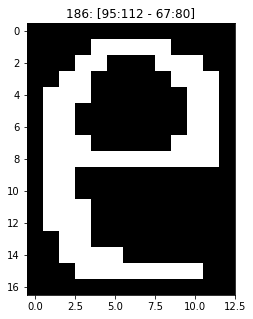

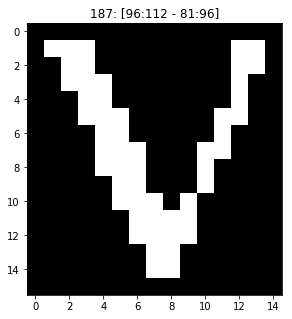

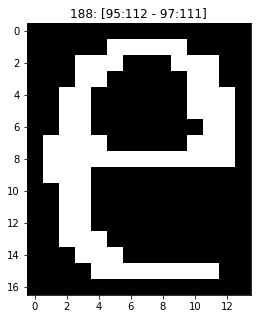

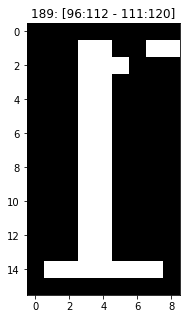

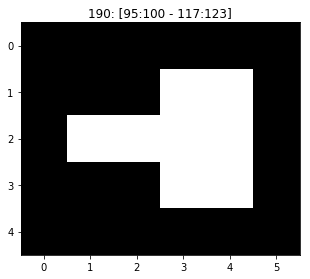

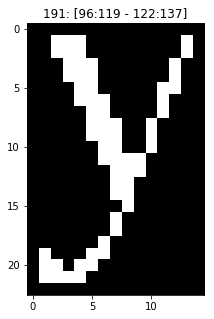

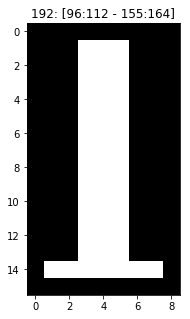

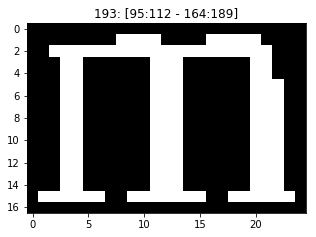

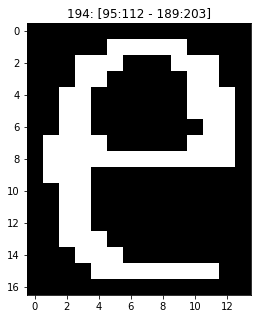

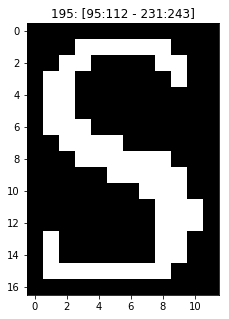

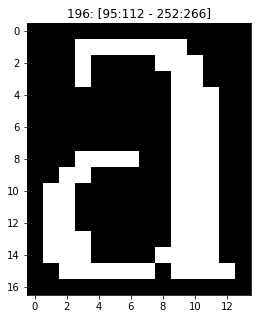

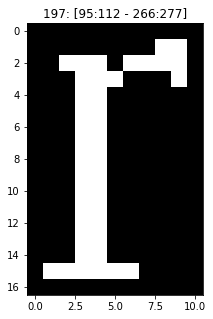

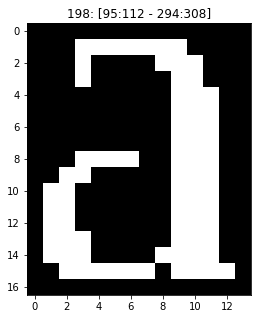

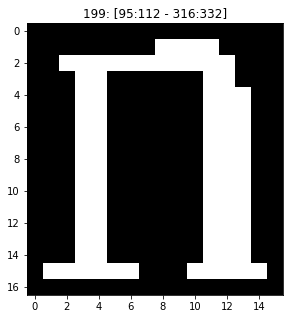

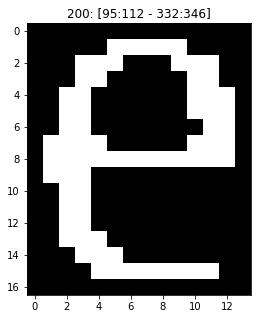

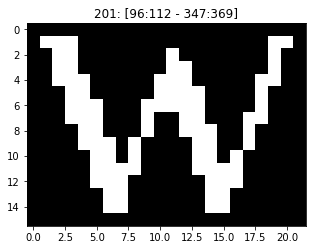

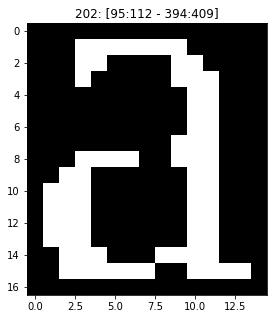

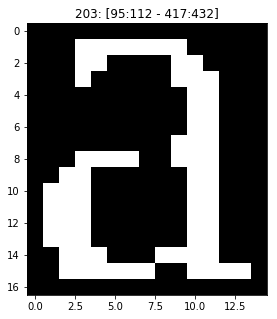

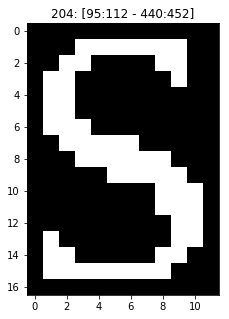

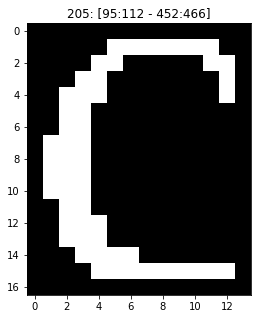

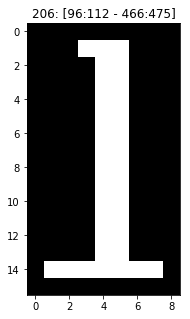

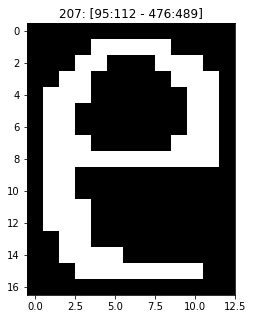

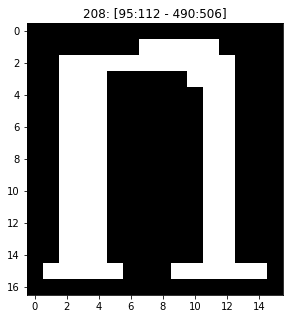

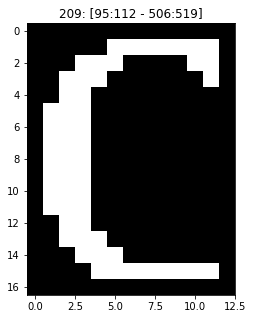

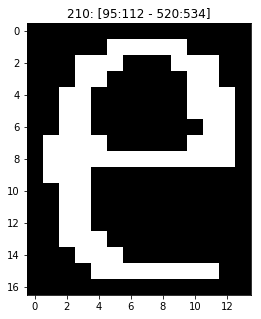

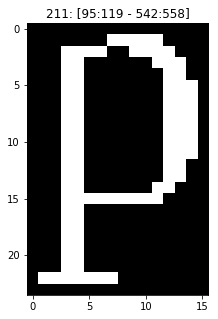

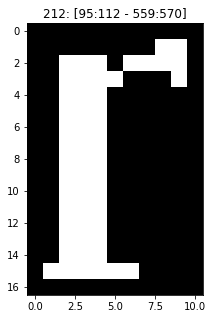

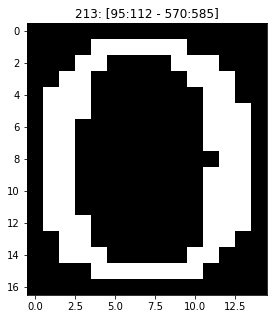

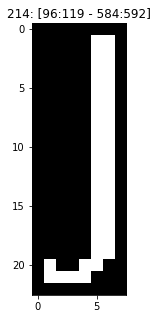

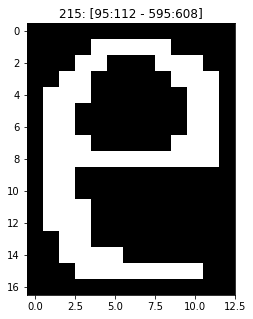

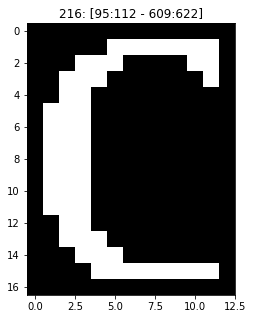

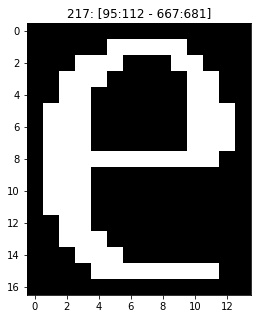

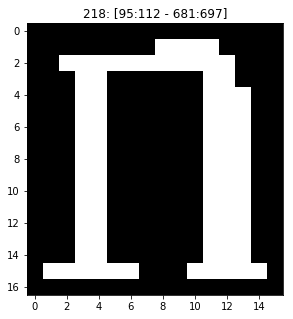

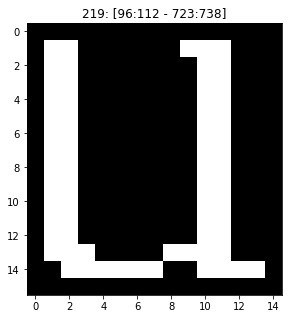

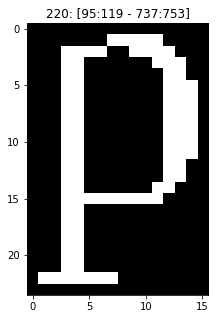

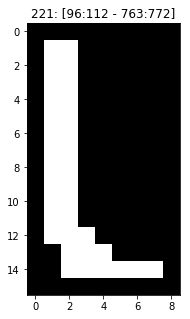

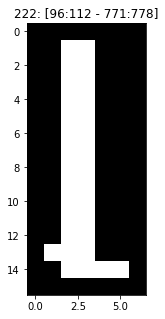

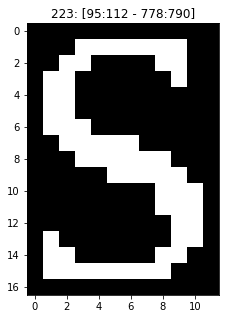

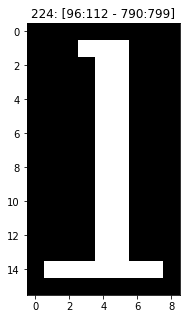

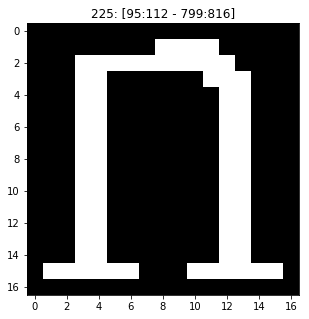

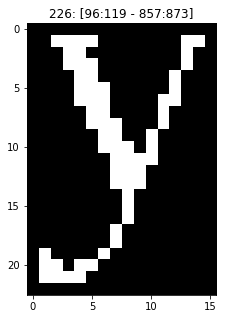

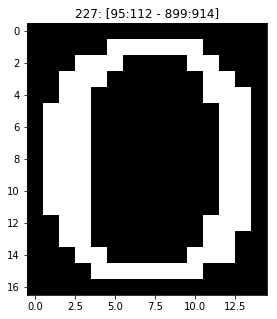

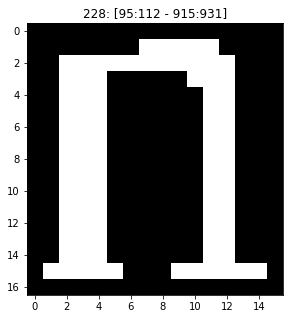

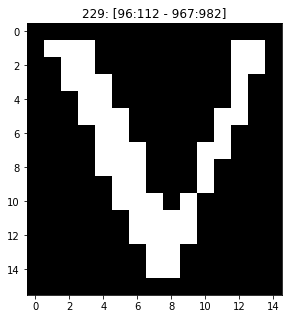

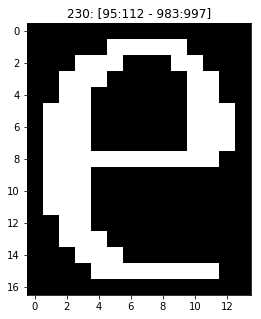

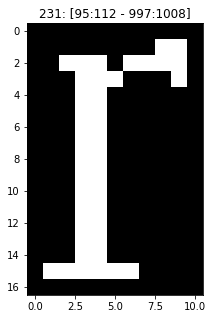

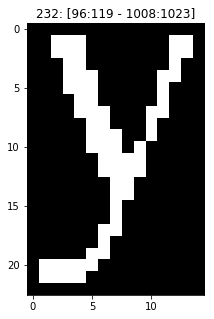

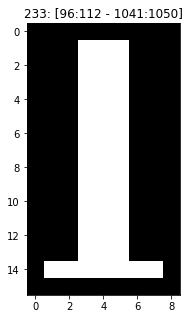

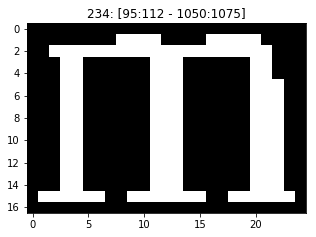

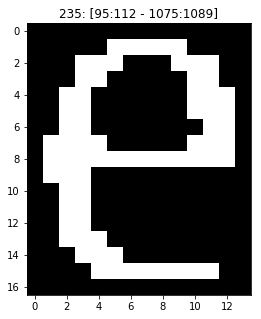

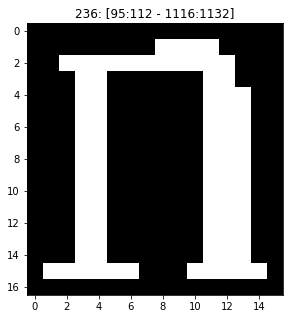

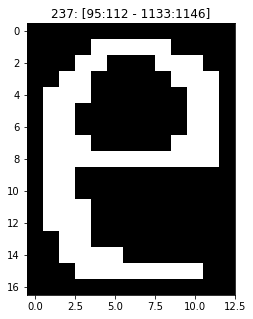

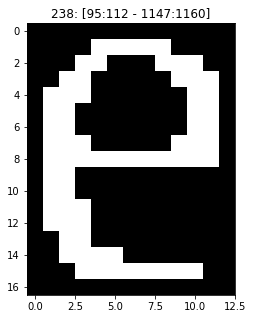

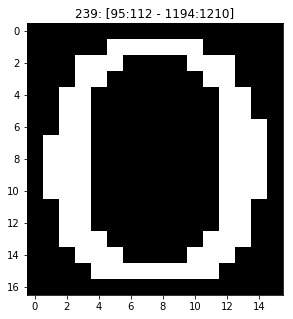

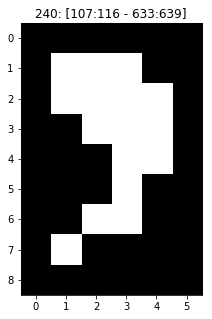

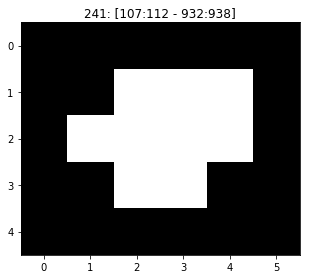

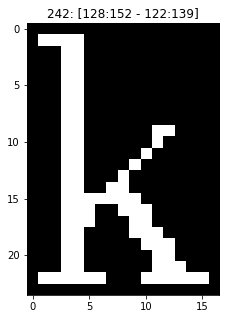

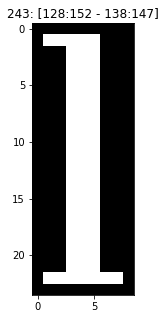

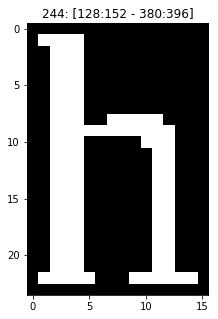

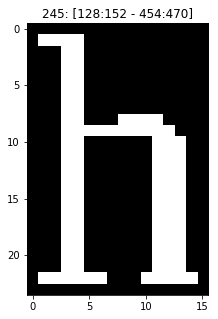

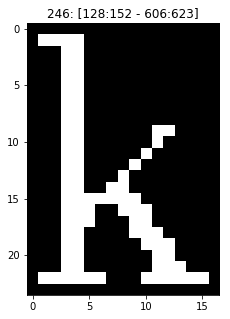

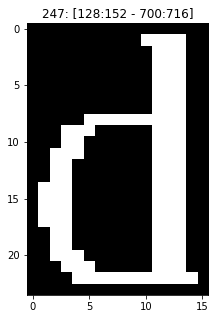

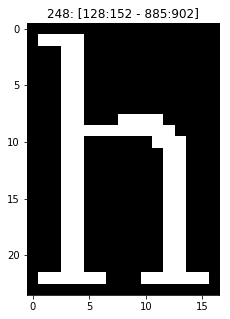

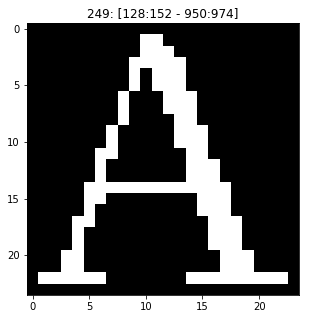

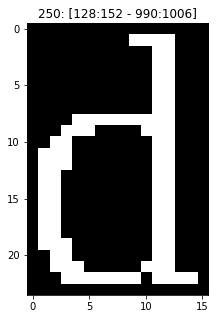

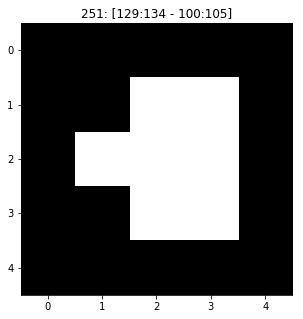

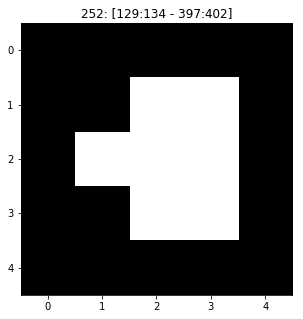

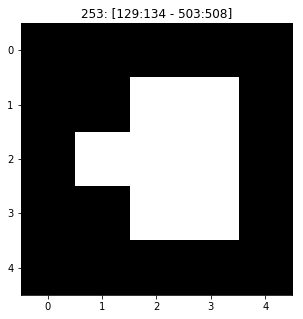

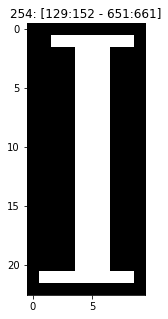

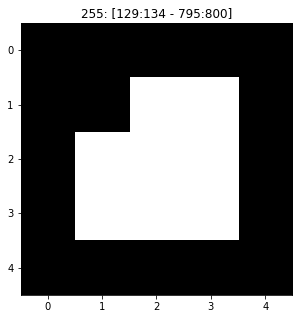

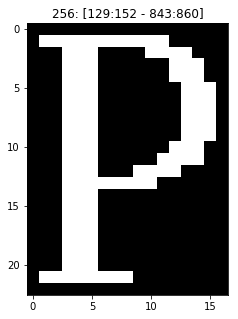

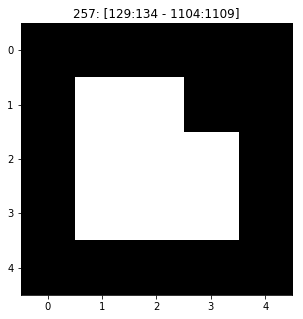

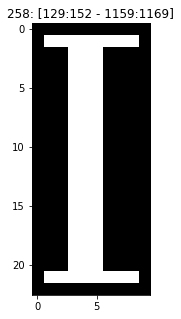

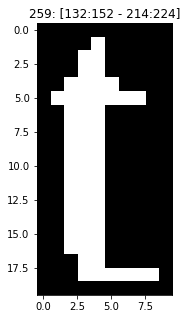

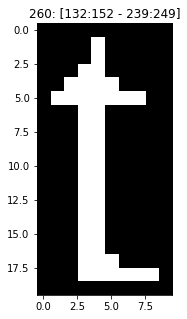

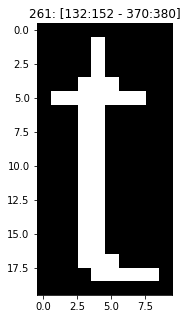

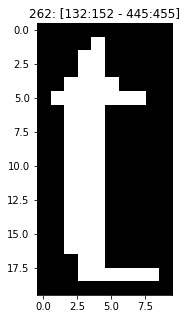

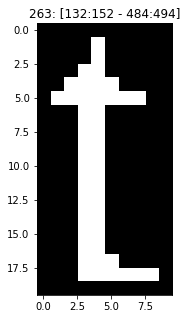

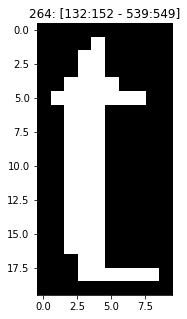

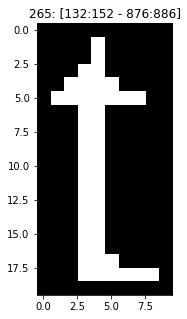

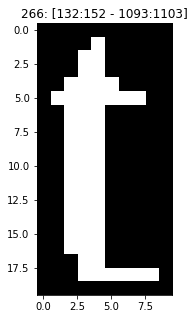

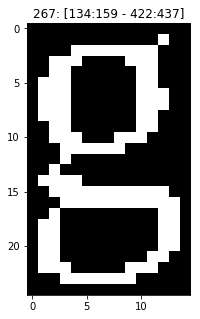

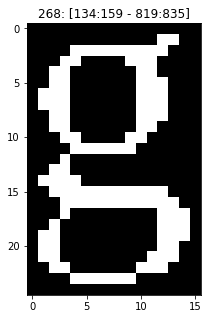

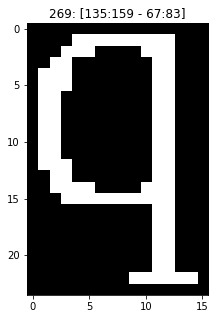

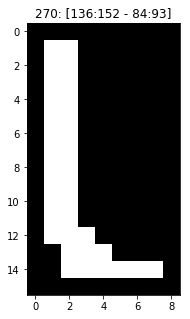

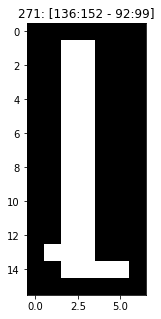

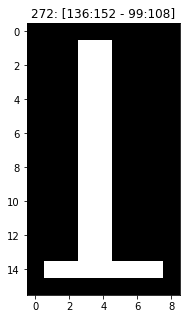

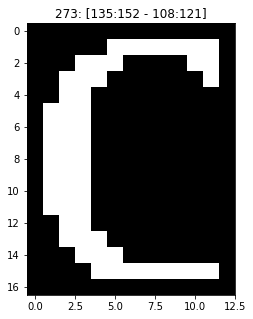

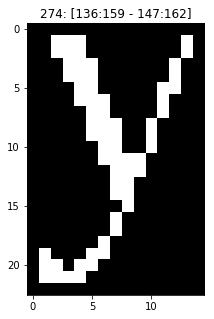

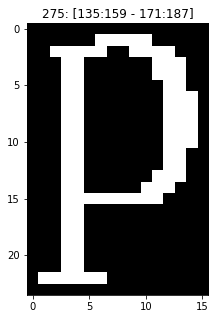

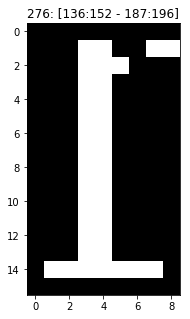

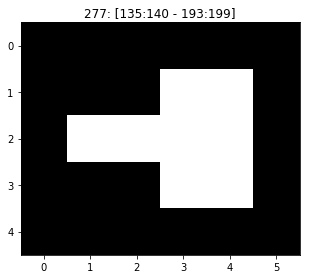

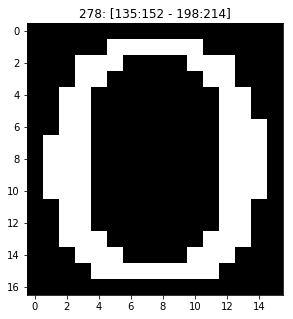

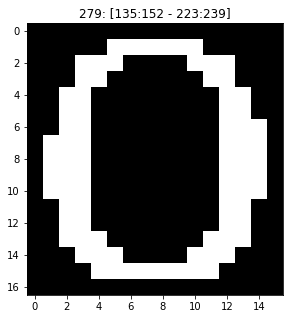

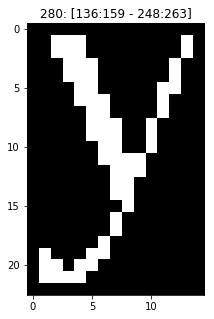

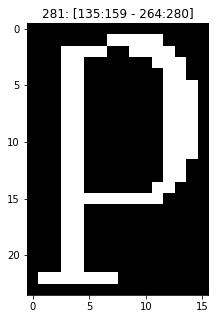

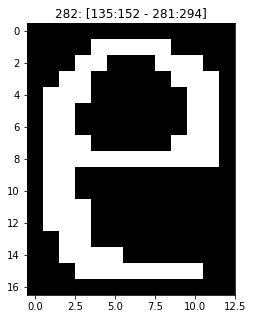

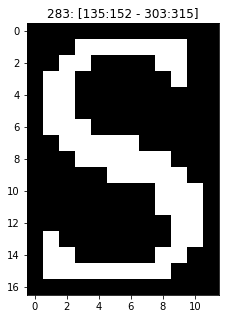

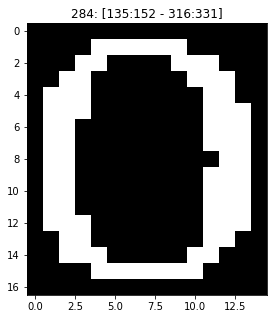

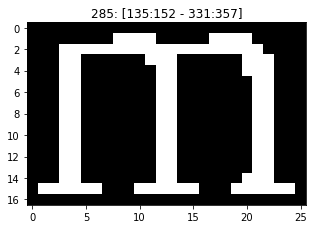

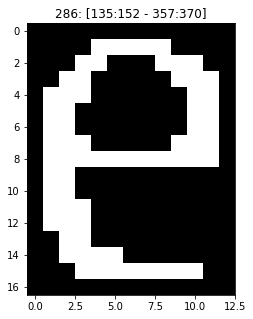

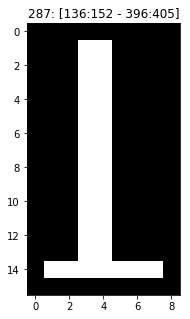

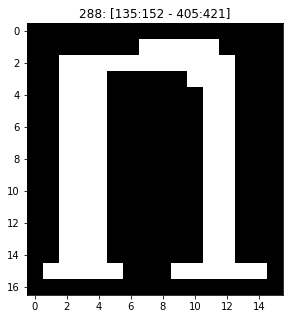

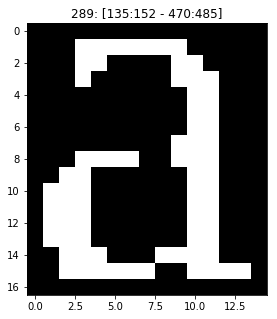

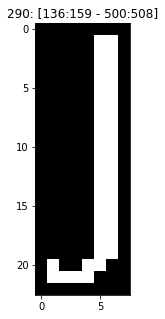

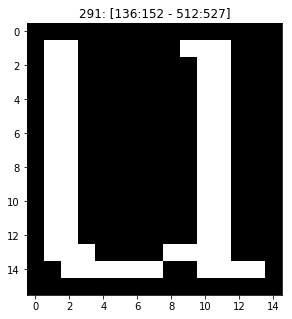

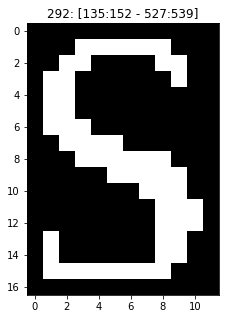

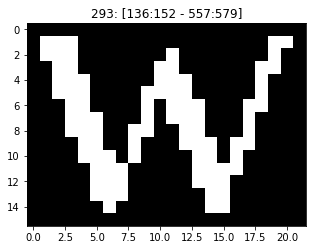

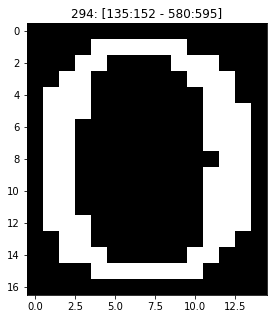

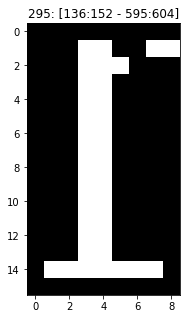

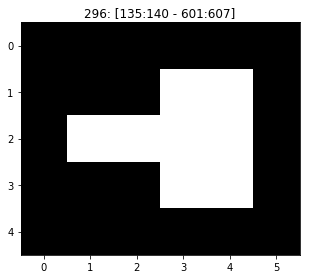

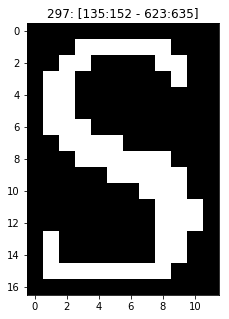

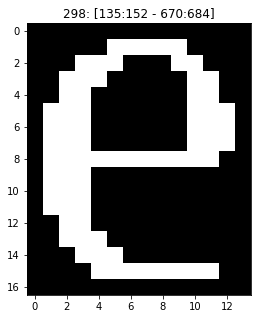

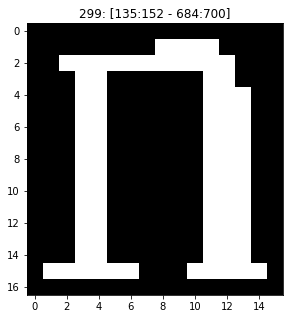

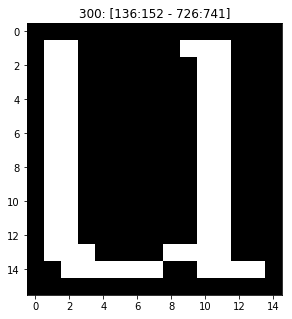

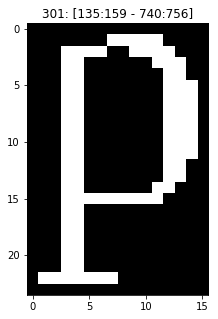

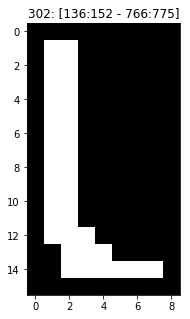

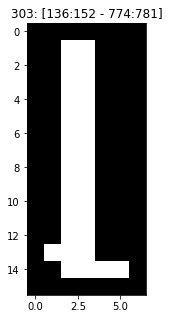

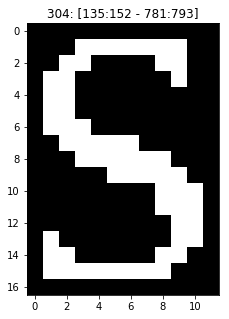

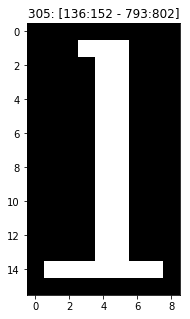

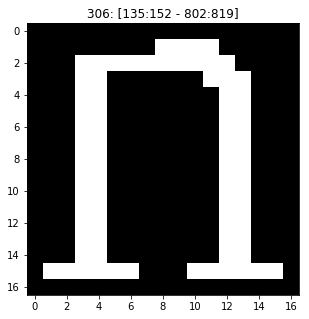

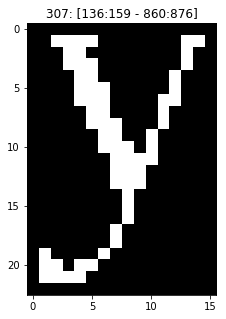

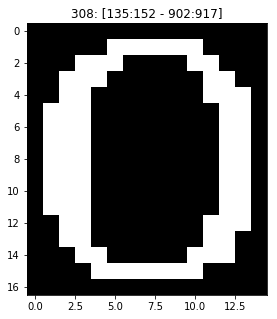

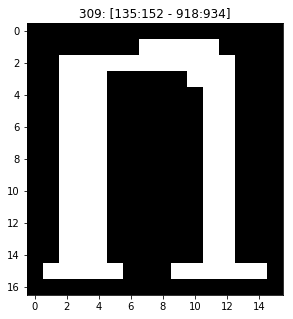

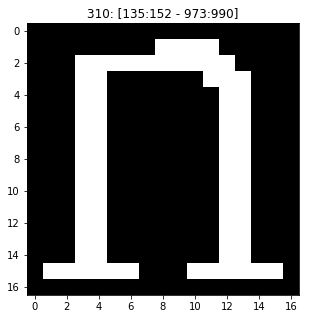

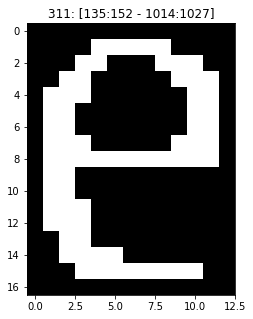

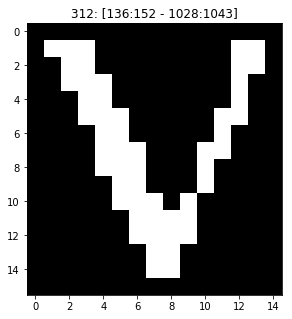

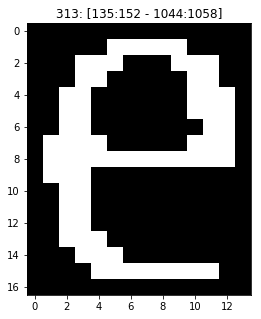

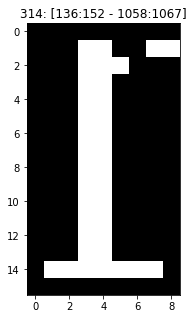

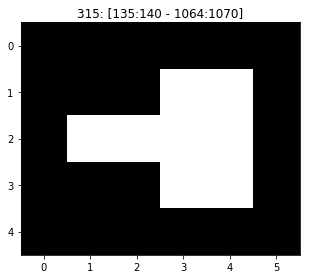

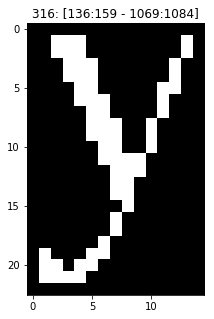

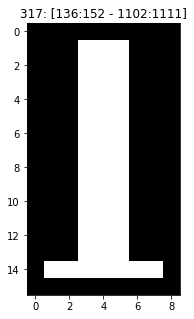

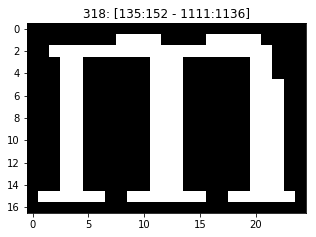

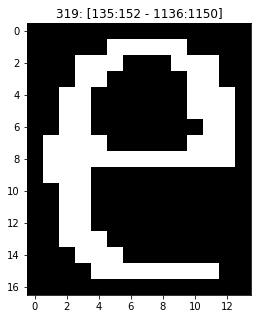

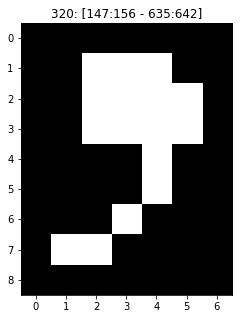

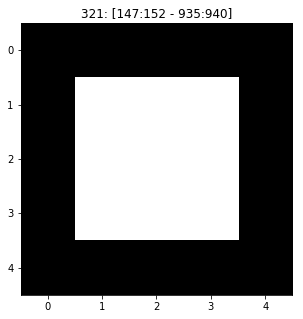

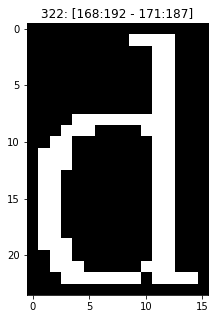

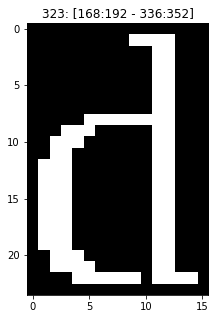

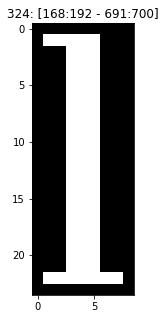

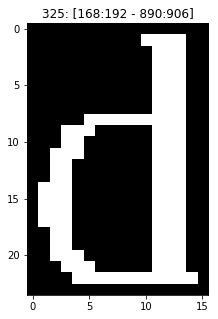

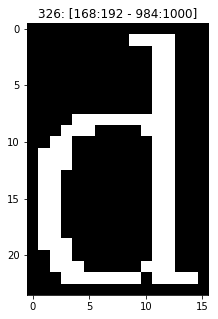

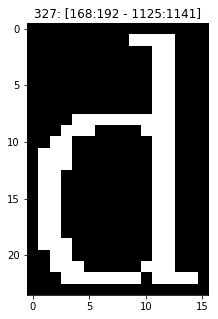

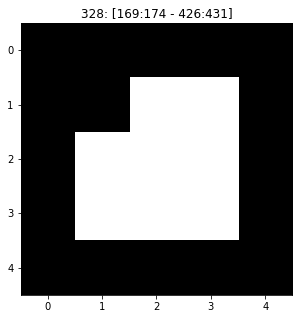

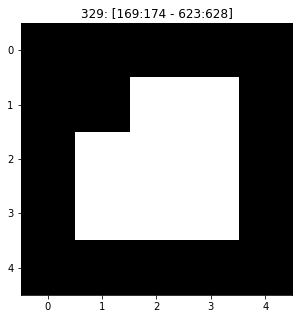

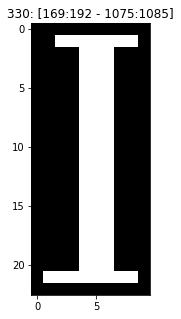

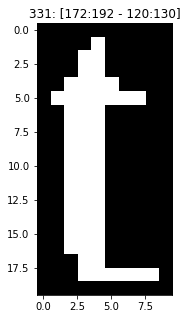

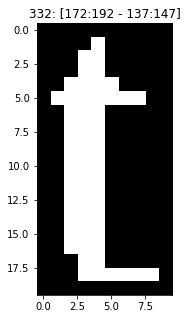

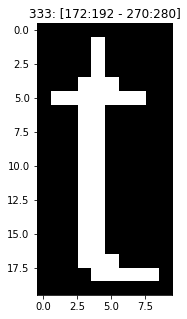

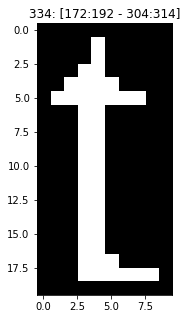

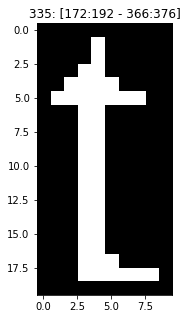

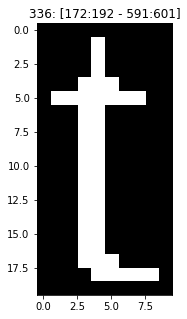

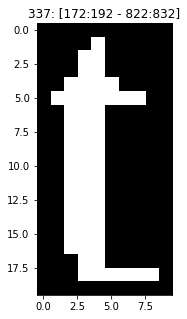

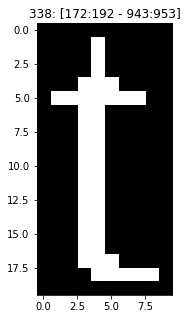

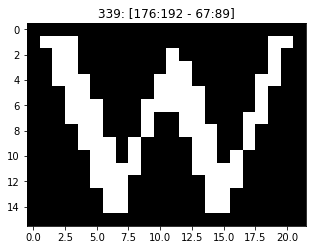

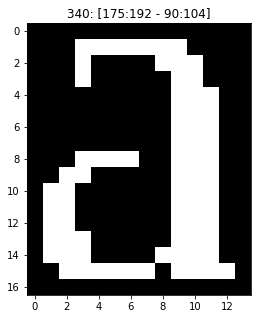

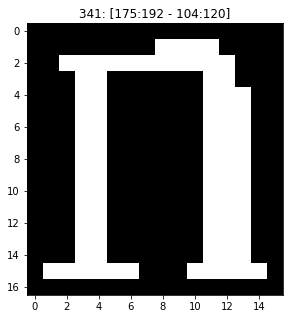

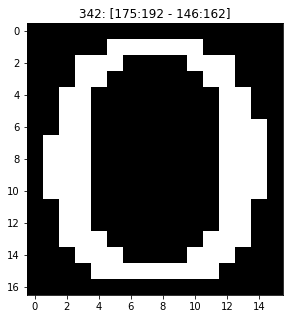

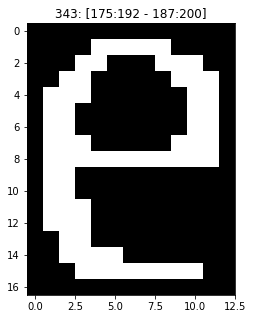

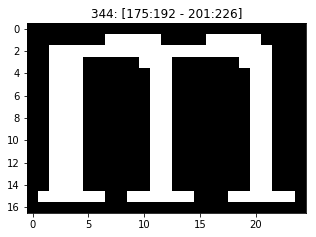

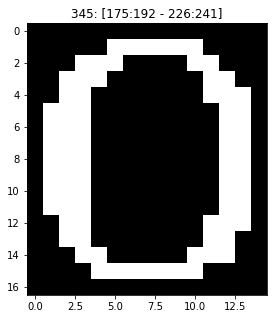

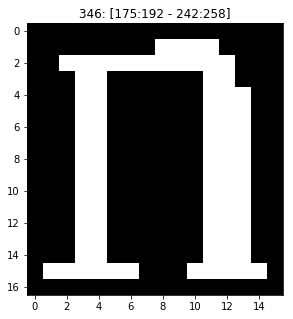

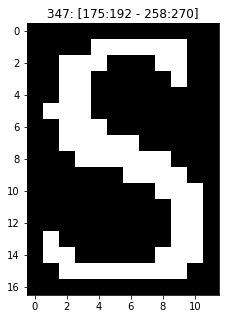

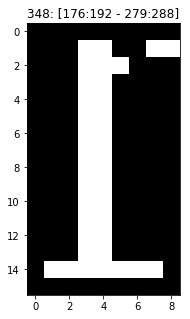

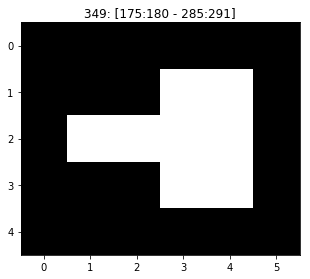

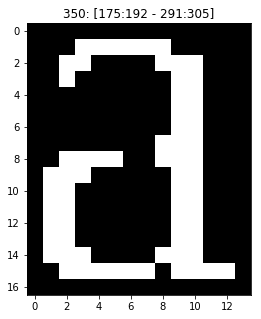

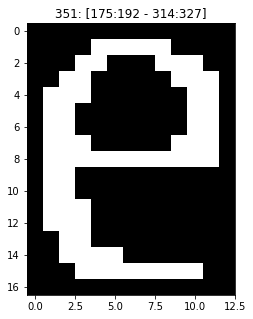

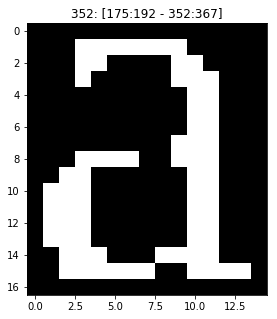

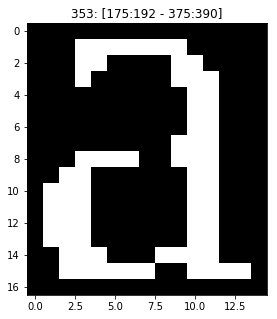

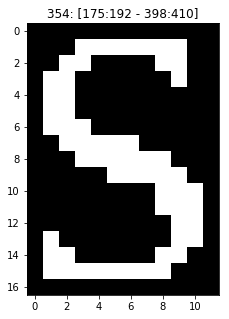

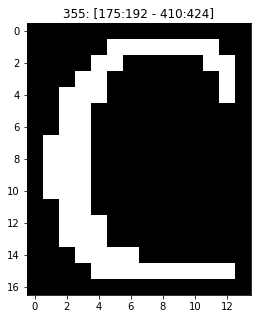

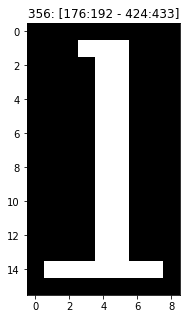

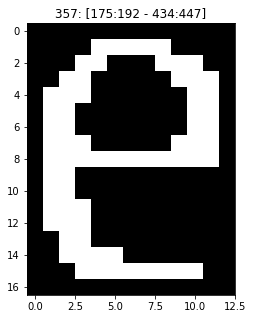

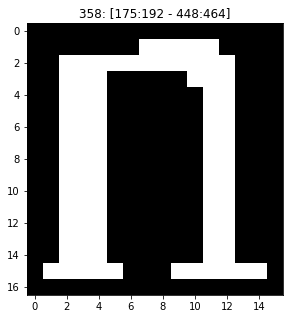

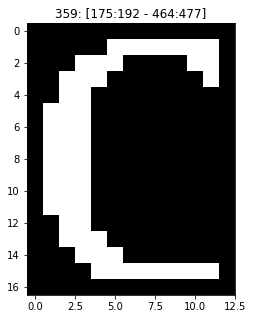

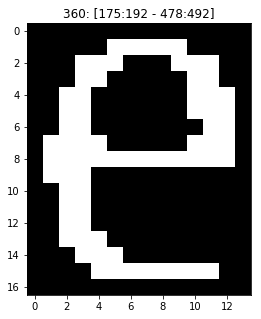

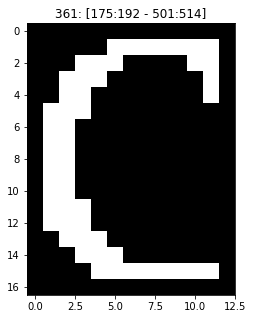

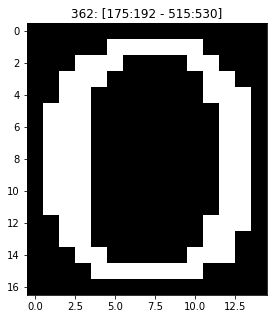

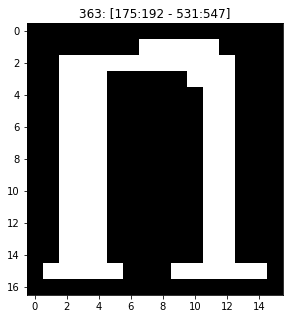

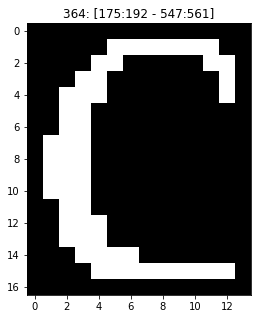

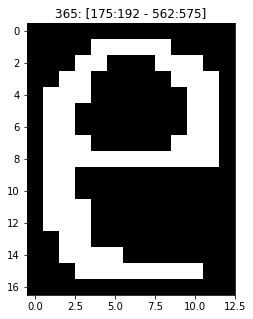

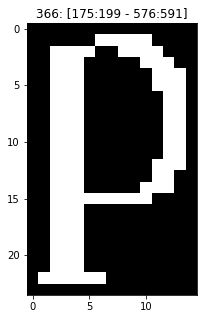

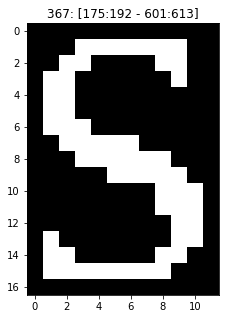

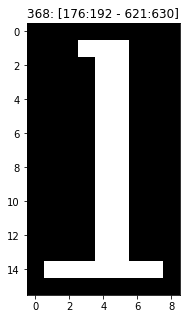

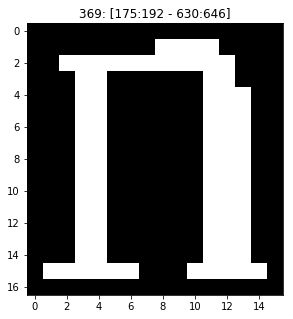

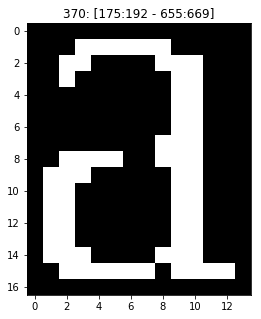

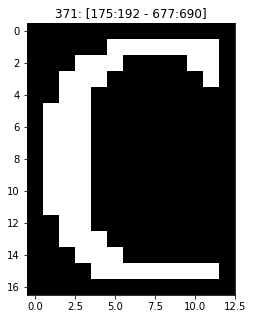

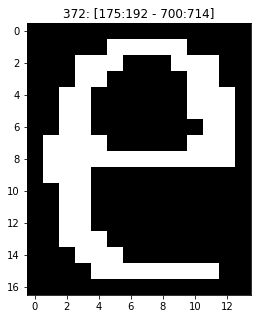

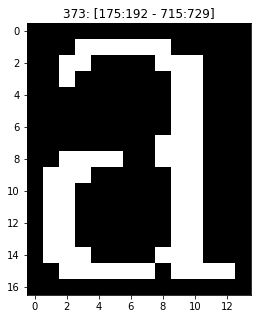

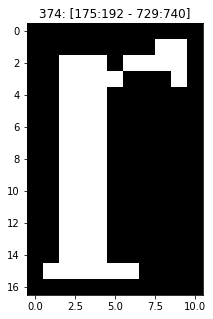

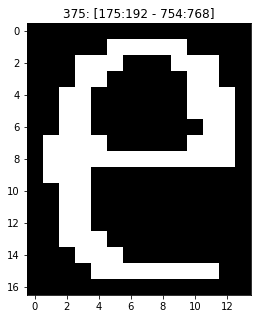

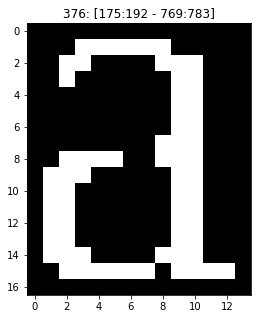

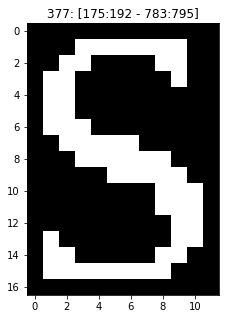

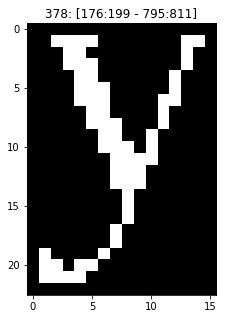

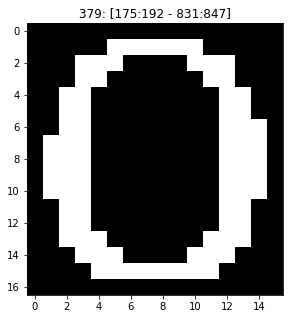

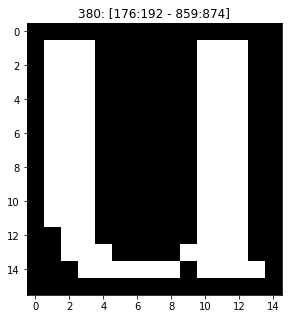

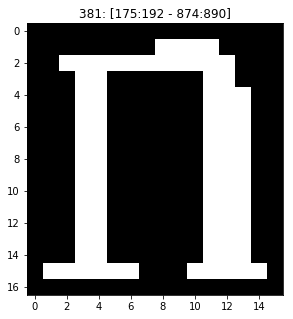

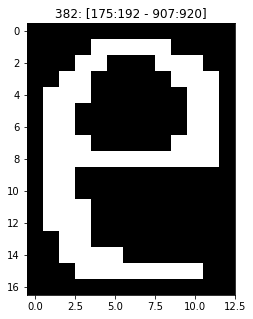

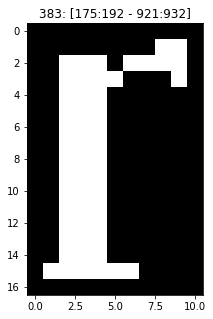

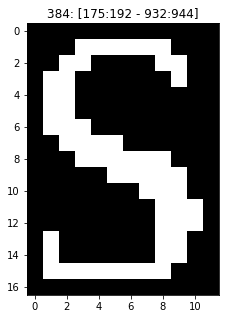

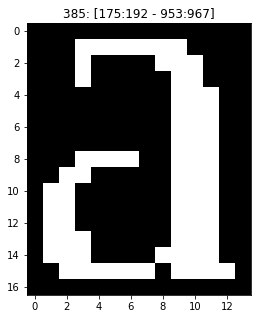

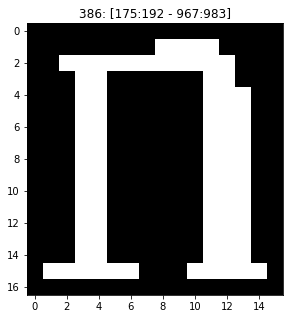

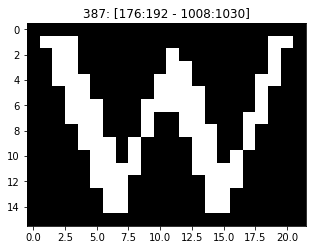

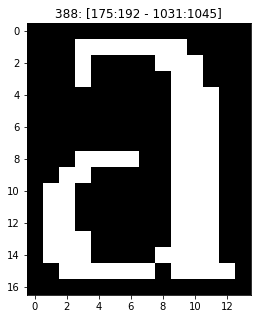

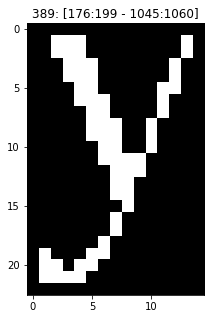

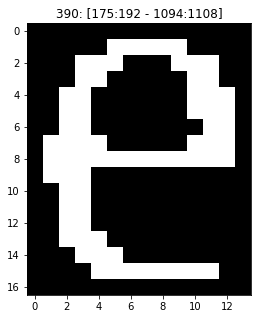

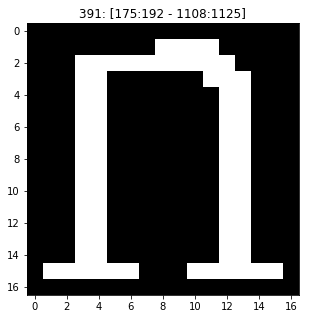

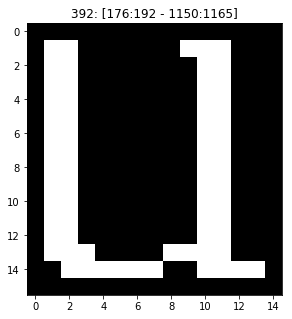

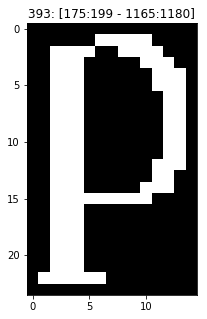

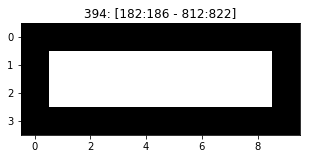

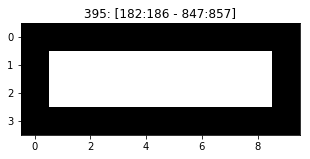

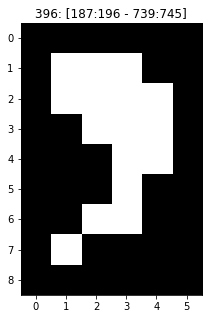

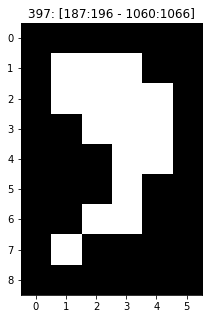

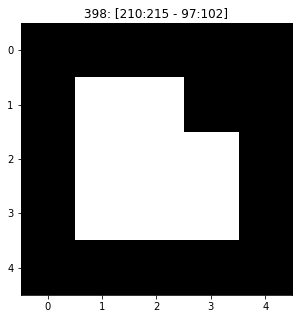

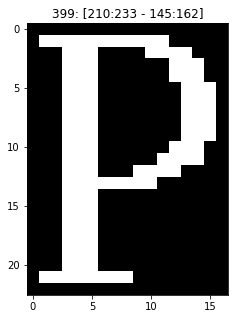

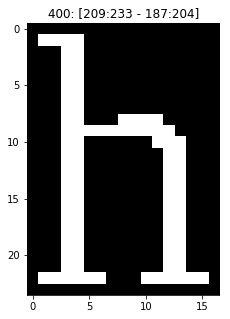

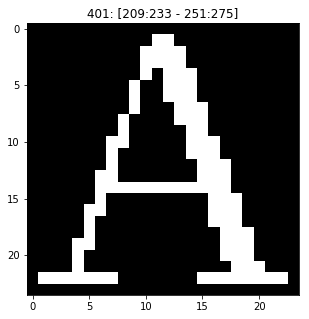

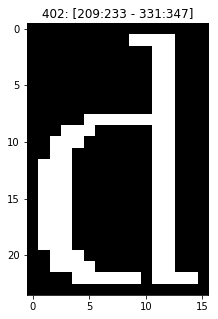

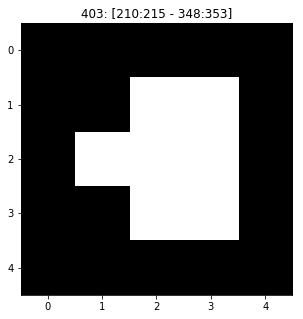

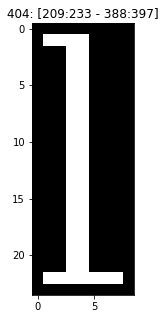

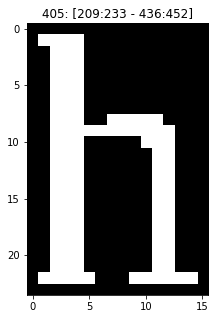

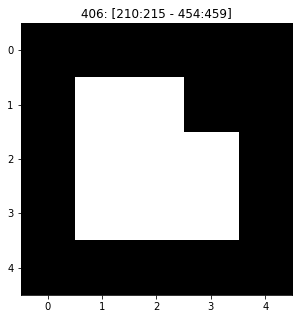

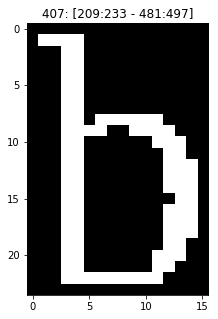

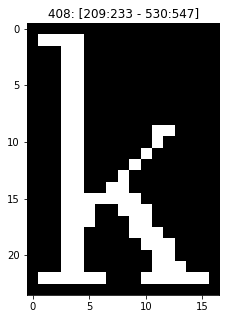

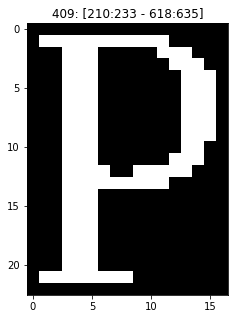

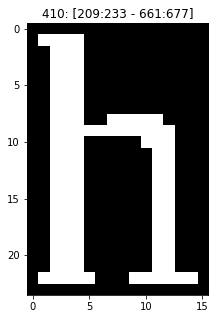

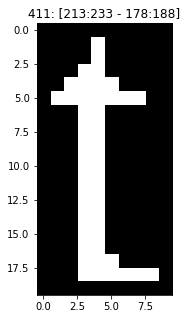

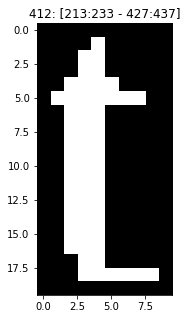

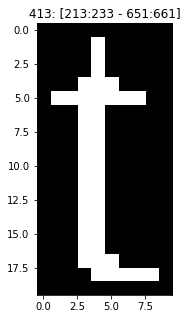

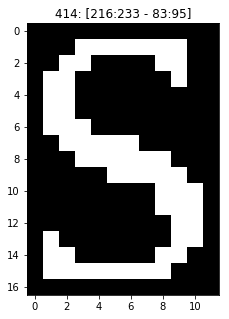

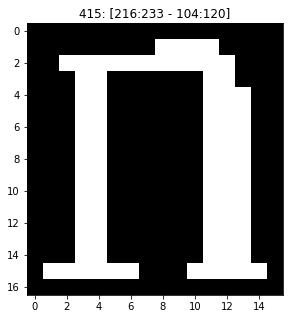

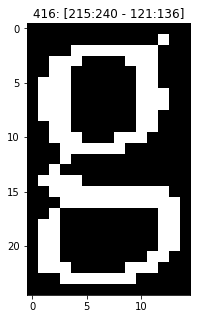

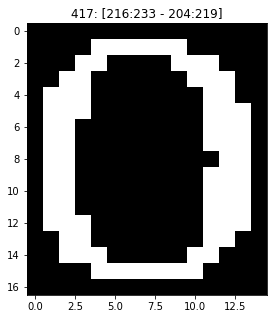

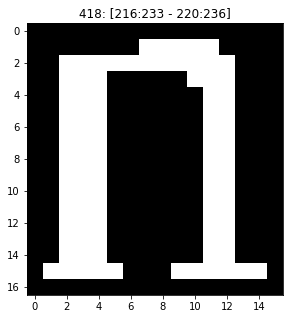

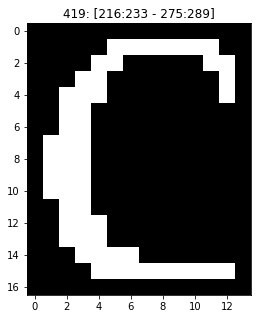

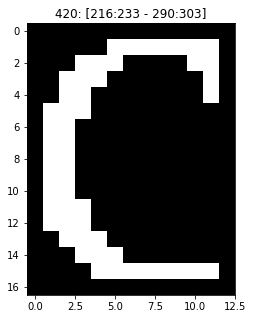

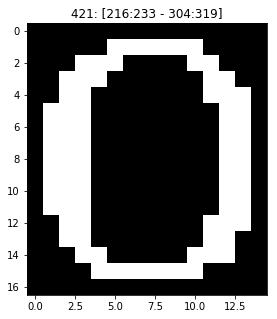

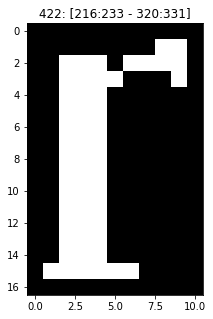

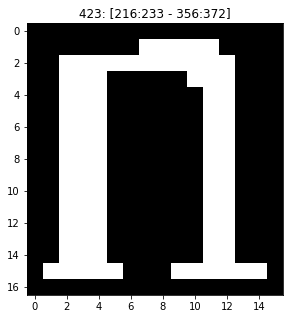

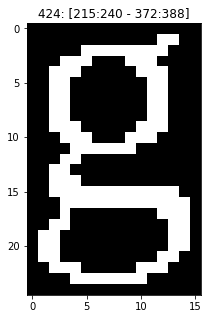

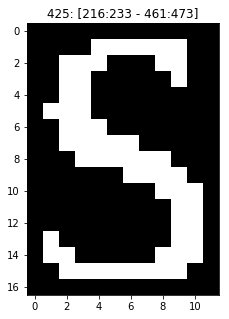

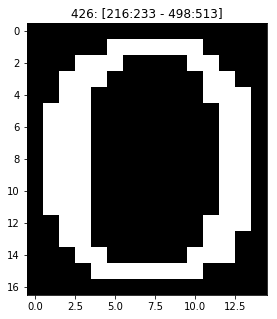

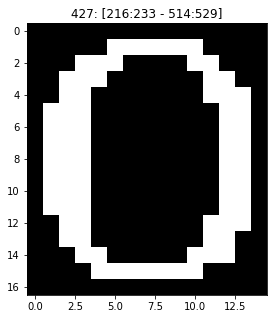

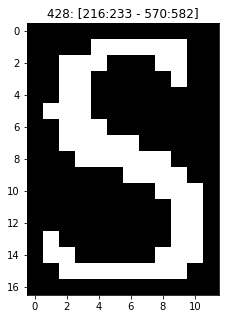

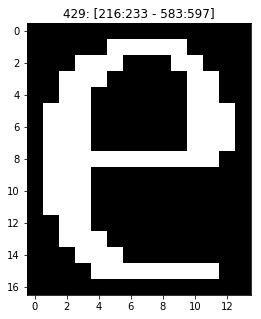

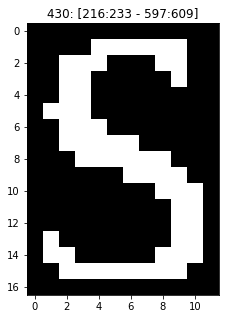

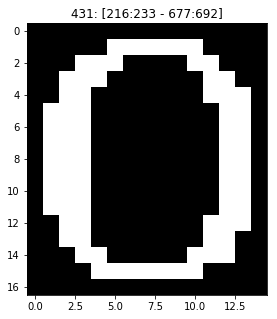

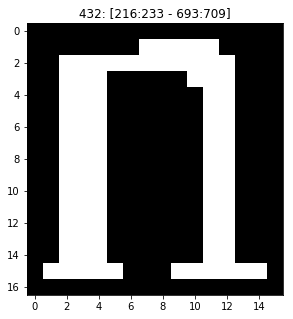

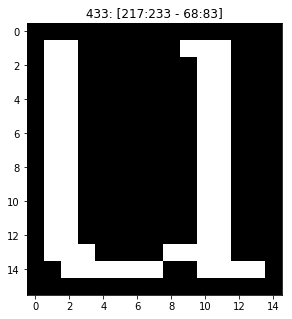

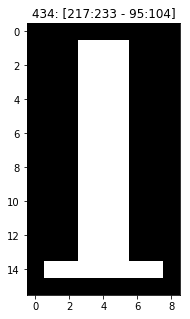

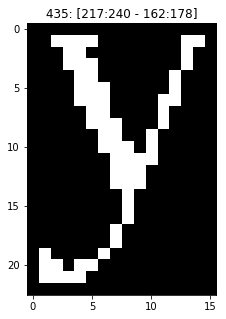

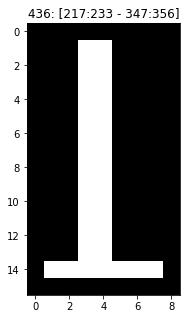

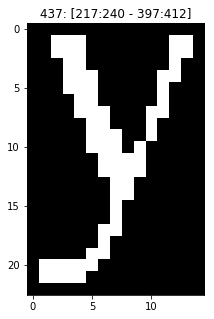

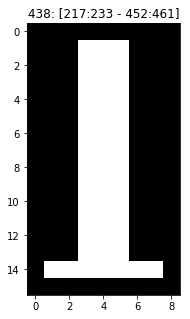

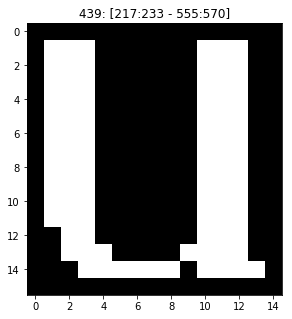

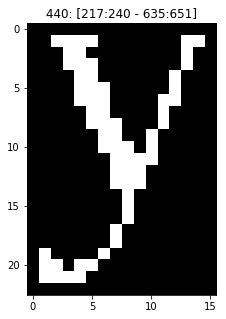

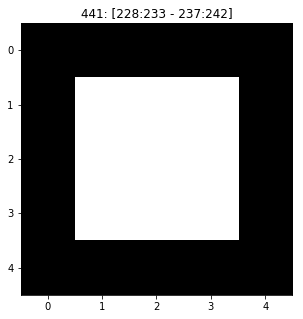

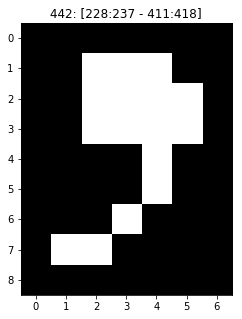

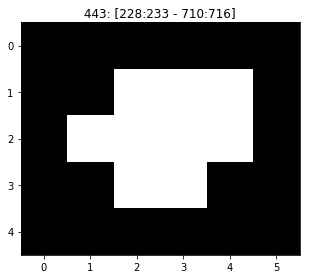

In [18]:
for label in range(1, ret):
    pos = np.where(labels == label)
    arx, ary = pos
    w, h = labels.shape

    arxs, arxe = min(arx), max(arx)
    arys, arye = min(ary), max(ary)

    xspan = abs(arxs - arxe)
    yspan = abs(arys - arye)

    xcenter, ycenter = (0.5 * abs(arxs + arxe)), (0.5 * abs(arys + arye))

    x1, x2 = xcenter - (0.5*xspan), xcenter + (0.5*xspan)
    y1, y2 = ycenter - (0.5*yspan), ycenter + (0.5*yspan)

    x1, x2, y1, y2 = list(map(int, [x1, x2, y1, y2]))
    
    x1 = 0 if x1 - 1 < 0 else x1 - 1
    y1 = 0 if y1 - 1 < 0 else y1 - 1

    x2 = w if x2 + 2 > w else x2 + 2
    y2 = h if y2 + 2 > h else y2 + 2
    
    fig=plt.figure(figsize=(5, 5))
    w, h, rows, columns = 10, 10, 1, 1

    li = [0, img]

    for k in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, k)
        ax.set_title('{}: [{}:{} - {}:{}]'.format(label, x1, x2, y1, y2))

    plt.imshow(img[x1:x2, y1:y2], cmap='gray')
    plt.show()